
# **Makine Öğrenmesinin Temelleri Ödev Proje**

**Mail Sınıflandırma Uygulaması**

**Hazırlayan: Bashar Alkhawlani**

In [3]:
%pip install --upgrade matplotlib


  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl (8.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords_tab')   # Downloading stopwords data
nltk.download('punkt_tab')       # Downloading tokenizer data

[nltk_data] Error loading stopwords_tab: Package 'stopwords_tab' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt_tab to C:\Users\Bashar
[nltk_data]     Alkhawlani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
#veri seti yükleme
df = pd.read_csv('Sms_dataSet.csv', encoding='latin1')


In [4]:
df.head

<bound method NDFrame.head of                                                    text label
0     Go until jurong point, crazy.. Available only ...   ham
1                         Ok lar... Joking wif u oni...   ham
2     Free entry in 2 a wkly comp to win FA Cup fina...  spam
3     U dun say so early hor... U c already then say...   ham
4     Nah I don't think he goes to usf, he lives aro...   ham
...                                                 ...   ...
6312  Dear Customer, You have a missed call from +91...  spam
6313  Dear User, Vistor Id - 7538XXX. Loan Applicati...  spam
6314  Congrats, Y0UR Received Rs.592000 L0AN is Appr...  spam
6315  Hi! 50% off on proc. fees will be gone soon! A...  spam
6316  Congrats User, Rs.15OOO Bonus is Credited to y...  spam

[6317 rows x 2 columns]>

In [5]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6317 non-null   object
 1   label   6317 non-null   object
dtypes: object(2)
memory usage: 98.8+ KB


(6317, 2)

In [6]:
df.isnull().sum()


text     0
label    0
dtype: int64

In [7]:
df.duplicated().sum()

424

In [8]:
df = df.drop_duplicates(keep = 'first')


In [9]:
df.shape


(5893, 2)

In [10]:
df.rename(columns = {'text': 'text','label': 'target' }, inplace = True)

C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\3941236072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'text': 'text','label': 'target' }, inplace = True)


In [11]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 76.63329373833362
percentage of 1 : 23.366706261666383


C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\1635514218.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_0 = (values[0] /total) * 100
C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\1635514218.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_1 = (values[1]/ total) *100


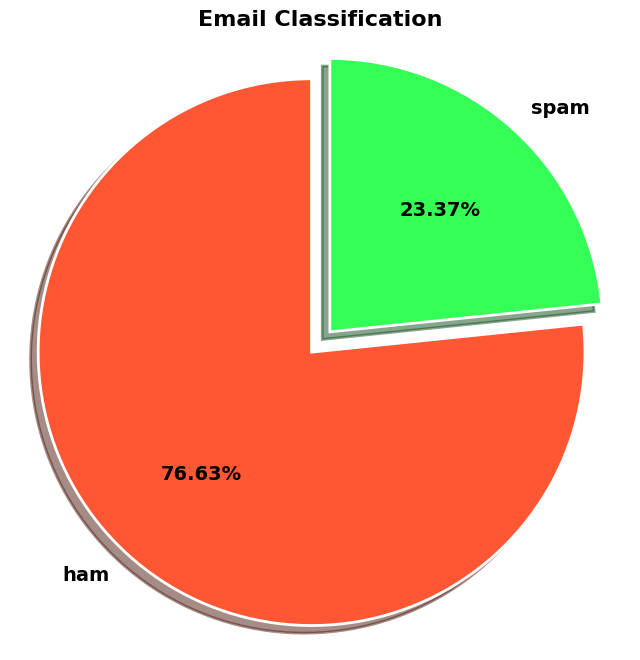

In [12]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()


ozellik muhendisligi

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\2897046421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = encoder.fit_transform(df['target'])


In [14]:
#Mesajin Uzunlugu ve yapisi
from nltk.tokenize import sent_tokenize, word_tokenize

df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(sent_tokenize(x)))


C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\2198060913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\2198060913.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\2198060913.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [15]:
df[['num_characters', 'num_words', 'num_sentence']].describe()


num_characters    num_words  num_sentence
count     5893.000000  5893.000000   5893.000000
mean        90.043950    20.235194      2.102834
std         65.140318    14.272230      1.796489
min          2.000000     1.000000      1.000000
25%         38.000000    10.000000      1.000000
50%         72.000000    17.000000      2.000000
75%        138.000000    28.000000      3.000000
max        910.000000   220.000000     52.000000

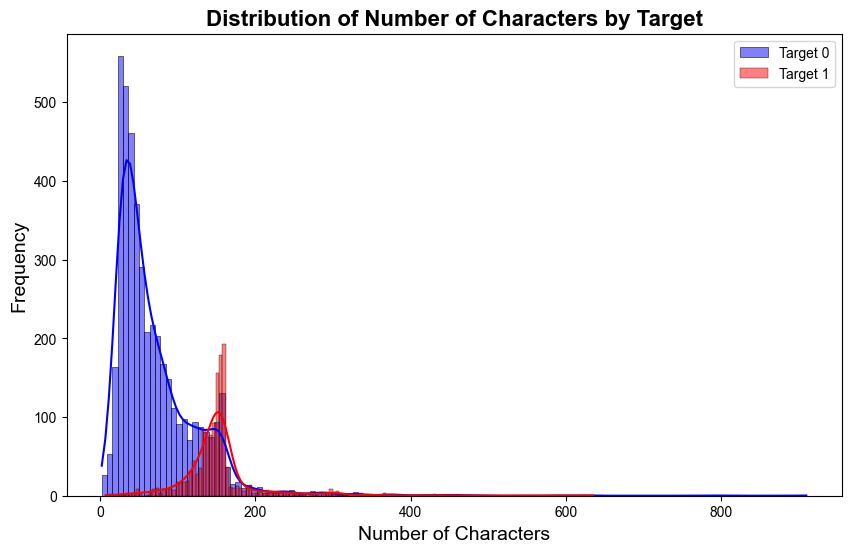

In [16]:
#Ham ve Spam Mesajlar için Karakter Uzunluğu Dağılımı
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

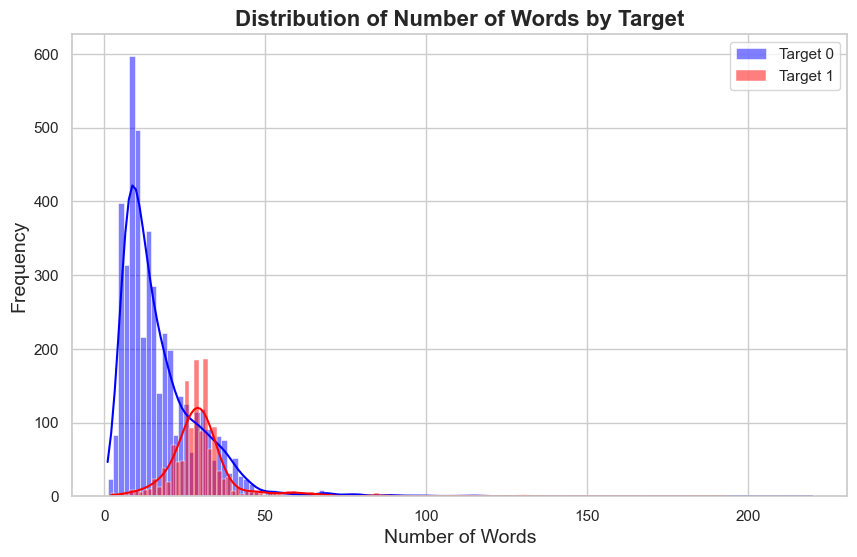

In [17]:
#Ham ve Spam Mesajlar için Kelime Sayisi Dağılımı

import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

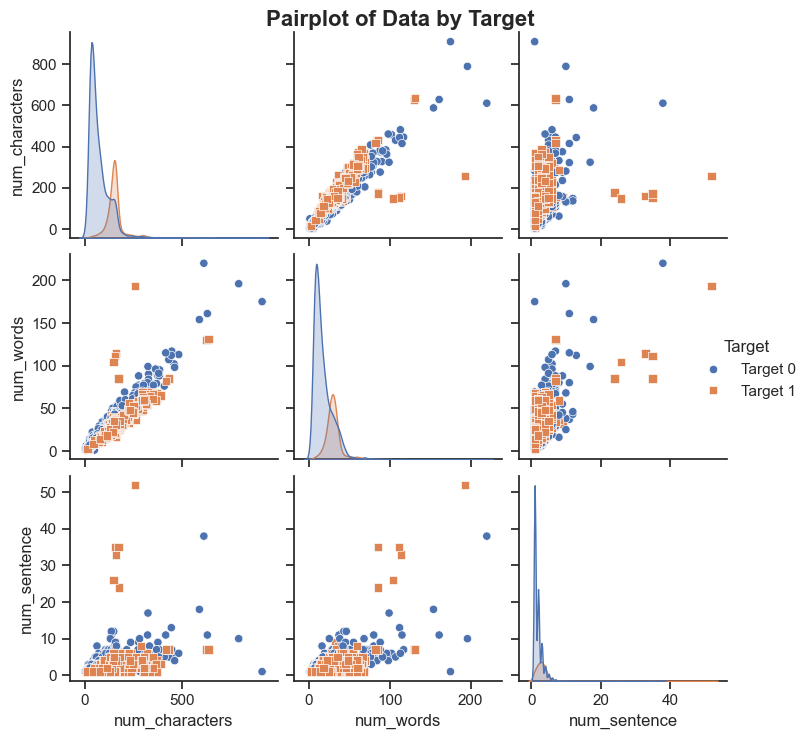

In [18]:
#Veri görselleştirme için pairplotVeri görselleştirme için pairplot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

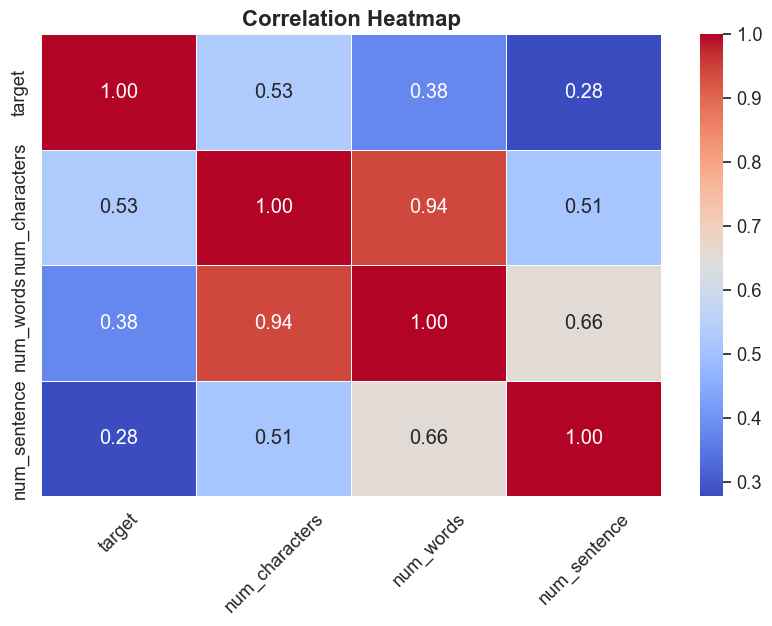

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

Veri Önişleme

In [20]:
# Metin kökünü çıkarmak için Porter Stemmer'ı içe aktarma
from nltk.stem.porter import PorterStemmer

# Özel karakterleri işlemek için string modülünü içe aktarma
import string

# Porter Stemmer nesnesi oluşturma
ps = PorterStemmer()

# Küçük harfe dönüştürme ve metin ön işleme fonksiyonu
def transform_text(text):
    # Metni küçük harfe dönüştürme
    text = text.lower()
    
    # NLTK kullanarak tokenizasyon
    text = nltk.word_tokenize(text)
    
    # Özel karakterleri kaldırma
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Stopwords ve noktalama işaretlerini kaldırma
    text = y[:]
    y.clear()
    
    # Token'lar üzerinde dönüp stopwords ve noktalama işaretlerini temizleme
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Porter Stemmer ile kök bulma işlemi (stemming)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # İşlenmiş token'ları tekrar birleştirme
    return " ".join(y)


In [21]:
#Örnek
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [22]:
# Işlenmiş metin için yeni sutun ekleme
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\176310348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [23]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#0800FF"), ('font-weight', 'bold')]}
])

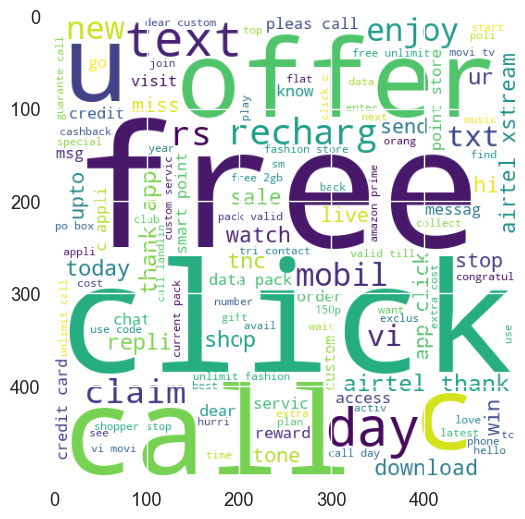

In [24]:
#Spam mesajları için kelime bulutu olusturma 
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()



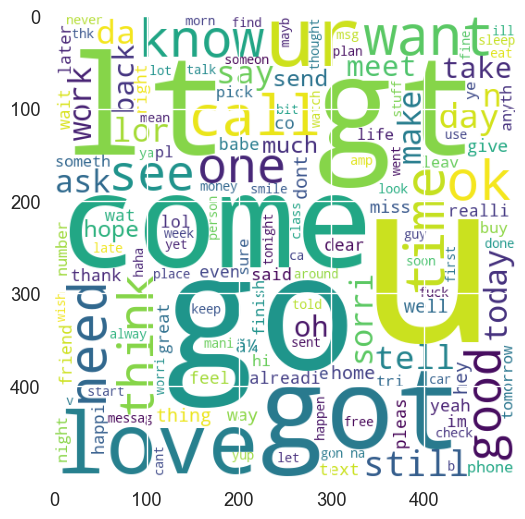

In [25]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\3206627492.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


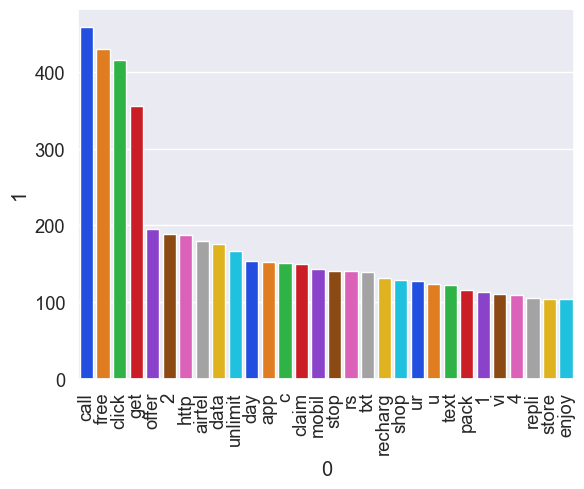

In [26]:
#Spam mesajlarında en çok geçen 30 kelimeyi bul
from collections import Counter

spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()        

C:\Users\Bashar Alkhawlani\AppData\Local\Temp\ipykernel_13024\2184078392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


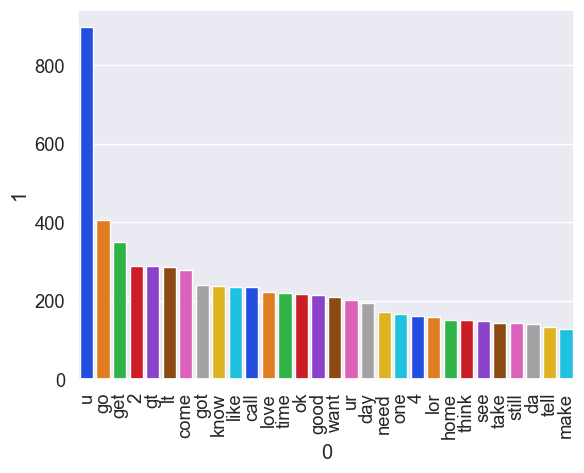

In [27]:
#Ham mesajlarında en çok geçen 30 kelimeyi bul
from collections import Counter

spam_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show() 

Model Olusturma

In [28]:
#Metinler vectorlere donusturme ve degiskenlerimizi belirleme
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [29]:
import pandas as pd

df_x = pd.DataFrame(X)   
df_x.to_csv("tfidf_matrix.csv", index=False)
df_y=pd.DataFrame(y)
df_y.to_csv("tfidf_matrix_Target.csv", index=False)


In [30]:
#Disardan tutma ile veriler modele hazirlama

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [31]:
#Modeller Yukleme
#1- Normal Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#2- Toplu ogrenme Modeller
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier




In [32]:
#Modellerin Hazırlanması
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)



In [33]:
#Modellerin Haritlama
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'Adaboost': abc,
    'Bgc': bc, 
}

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

def train_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # tahminler
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    # F1-score
    f1 = f1_score(y_test, y_pred)

    # Defaults for ROC
    fpr, tpr, auc_score = None, None, None

    # ROC-AUC: Try predict_proba
    if hasattr(model, "predict_proba"):
        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)
        except:
            pass

    # ROC-AUC: Try decision_function
    elif hasattr(model, "decision_function"):
        try:
            y_prob = model.decision_function(X_test)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc_score = auc(fpr, tpr)
        except:
            pass

    return accuracy, precision, recall, specificity, f1, cm, auc_score, fpr, tpr


In [35]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []
auc_scores = []
cms = {}
fprs = {}
tprs = {}

for name, model in clfs.items():
    print("="*60)
    print("Model:", name)

    try:
        acc, prec, rec, spec, f1, cm, auc_score, fpr, tpr = train_classifier(
            model, X_train, y_train, X_test, y_test
        )

        print("\n🟩 Accuracy:", acc)
        print("🟦 Precision:", prec)
        print("🟧 Recall (Duyarlılık):", rec)
        print("🟪 Specificity (Özgüllük):", spec)
        print("🟥 F1-Score:", f1)

        print("\n🟫 Karışıklık Matrisi (Confusion Matrix):")
        print(cm)

        if auc_score is not None:
            print("\n🟩 AUC Skoru:", auc_score)
        else:
            print("\n⚠️ Bu model ROC-AUC desteklemiyor.")

        # Save results for plotting
        cms[name] = cm
        fprs[name] = fpr
        tprs[name] = tpr

        accuracy_scores.append(acc)
        precision_scores.append(prec)
        recall_scores.append(rec)
        specificity_scores.append(spec)
        f1_scores.append(f1)
        auc_scores.append(auc_score)

    except Exception as e:
        print(f"⚠️ Model '{name}' hata verdi ve çalıştırılamadı.")
        print("Hata:", e)
        continue


Model: SVC

🟩 Accuracy: 0.9728583545377438
🟦 Precision: 0.9641434262948207
🟧 Recall (Duyarlılık): 0.9132075471698113
🟪 Specificity (Özgüllük): 0.9901531728665208
🟥 F1-Score: 0.937984496124031

🟫 Karışıklık Matrisi (Confusion Matrix):
[[905   9]
 [ 23 242]]

🟩 AUC Skoru: 0.9931959869534701
Model: KNN

🟩 Accuracy: 0.8659881255301103
🟦 Precision: 1.0
🟧 Recall (Duyarlılık): 0.4037735849056604
🟪 Specificity (Özgüllük): 1.0
🟥 F1-Score: 0.5752688172043011

🟫 Karışıklık Matrisi (Confusion Matrix):
[[914   0]
 [158 107]]

🟩 AUC Skoru: 0.8393088642087446
Model: NB

🟩 Accuracy: 0.9754028837998303
🟦 Precision: 0.9758064516129032
🟧 Recall (Duyarlılık): 0.9132075471698113
🟪 Specificity (Özgüllük): 0.9934354485776805
🟥 F1-Score: 0.9434697855750487

🟫 Karışıklık Matrisi (Confusion Matrix):
[[908   6]
 [ 23 242]]

🟩 AUC Skoru: 0.9908756863878453
Model: DT

🟩 Accuracy: 0.9134860050890585
🟦 Precision: 0.9312169312169312
🟧 Recall (Duyarlılık): 0.6641509433962264
🟪 Specificity (Özgüllük): 0.985776805251641

d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟩 Accuracy: 0.9525021204410518
🟦 Precision: 0.9409282700421941
🟧 Recall (Duyarlılık): 0.8415094339622642
🟪 Specificity (Özgüllük): 0.9846827133479212
🟥 F1-Score: 0.8884462151394422

🟫 Karışıklık Matrisi (Confusion Matrix):
[[900  14]
 [ 42 223]]

🟩 AUC Skoru: 0.9625263201354197
Model: Bgc

🟩 Accuracy: 0.9567430025445293
🟦 Precision: 0.9212598425196851
🟧 Recall (Duyarlılık): 0.8830188679245283
🟪 Specificity (Özgüllük): 0.9781181619256017
🟥 F1-Score: 0.9017341040462428

🟫 Karışıklık Matrisi (Confusion Matrix):
[[894  20]
 [ 31 234]]

🟩 AUC Skoru: 0.9802836381652286


In [36]:
import pandas as pd

results = pd.DataFrame({
    "Model": list(clfs.keys()),
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall (Duyarlılık)": recall_scores,
    "Specificity (Özgüllük)": specificity_scores,
    "F1 Score": f1_scores,
    "AUC": auc_scores
})

print("\n\n=== MODELLERİN KARŞILAŞTIRMA TABLOSU ===")
print(results)




=== MODELLERİN KARŞILAŞTIRMA TABLOSU ===
      Model  Accuracy  Precision  Recall (Duyarlılık)  Specificity (Özgüllük)  \
0       SVC  0.972858   0.964143             0.913208                0.990153   
1       KNN  0.865988   1.000000             0.403774                1.000000   
2        NB  0.975403   0.975806             0.913208                0.993435   
3        DT  0.913486   0.931217             0.664151                0.985777   
4        LR  0.949958   0.959821             0.811321                0.990153   
5  Adaboost  0.952502   0.940928             0.841509                0.984683   
6       Bgc  0.956743   0.921260             0.883019                0.978118   

   F1 Score       AUC  
0  0.937984  0.993196  
1  0.575269  0.839309  
2  0.943470  0.990876  
3  0.775330  0.823579  
4  0.879346  0.981407  
5  0.888446  0.962526  
6  0.901734  0.980284  


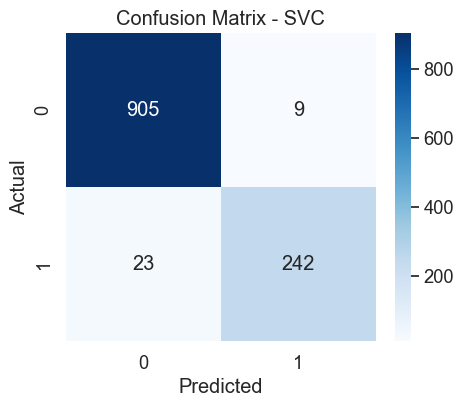

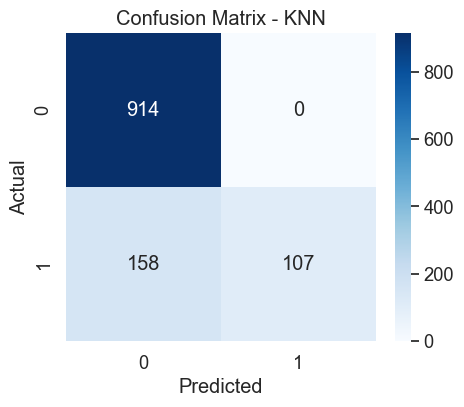

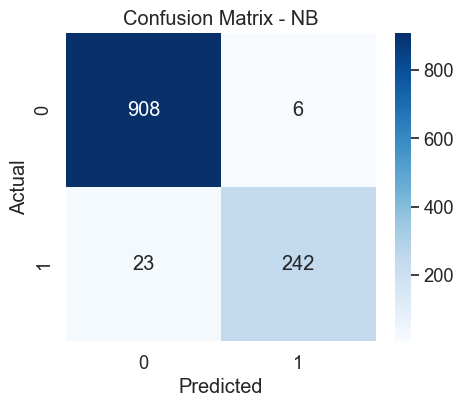

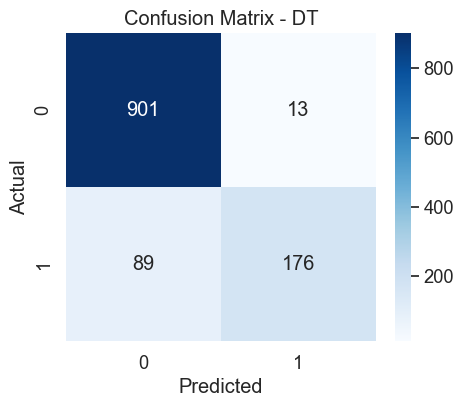

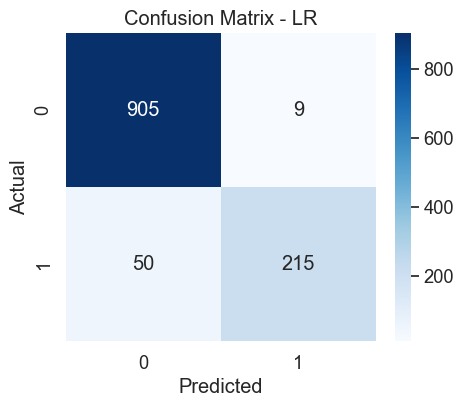

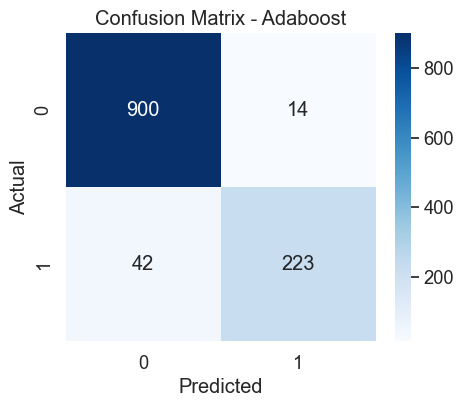

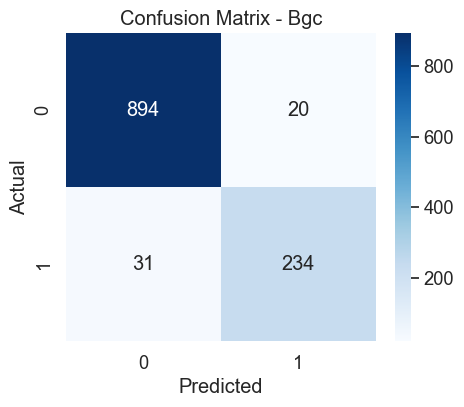

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, cm in cms.items():
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


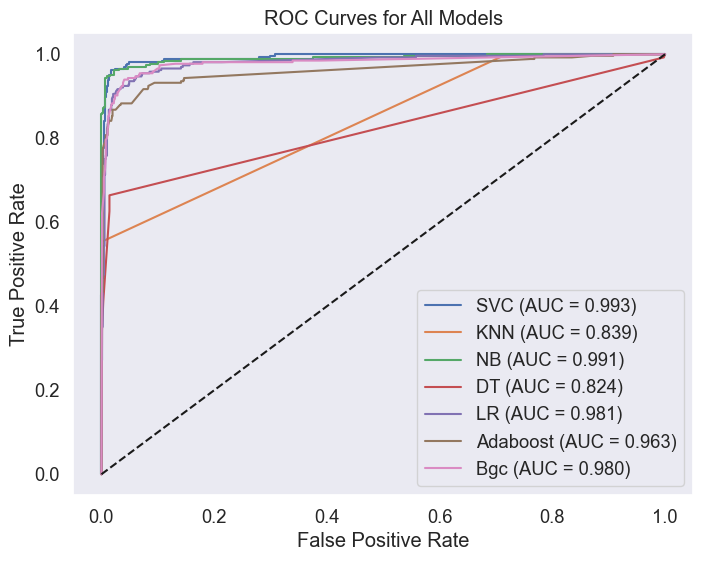

In [ ]:
plt.figure(figsize=(8,6))

for model_name in clfs.keys():
    fpr = fprs[model_name]
    tpr = tprs[model_name]
    auc_score = auc_scores[list(clfs.keys()).index(model_name)]
    
    if fpr is not None and tpr is not None:
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.grid()
plt.show()


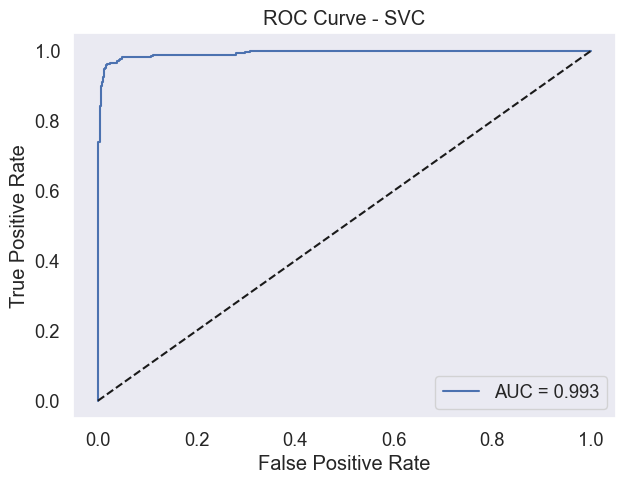

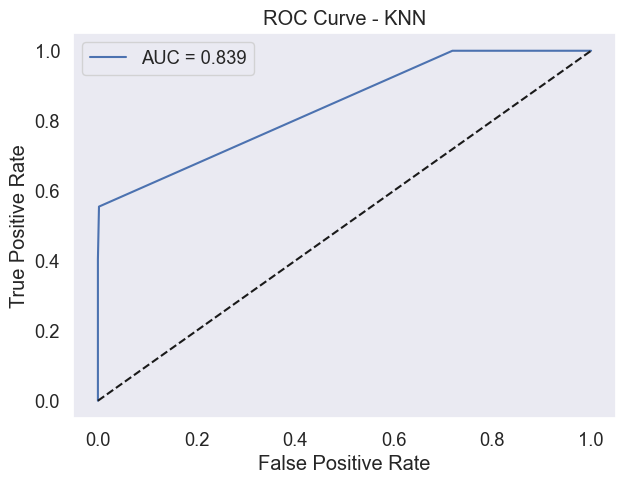

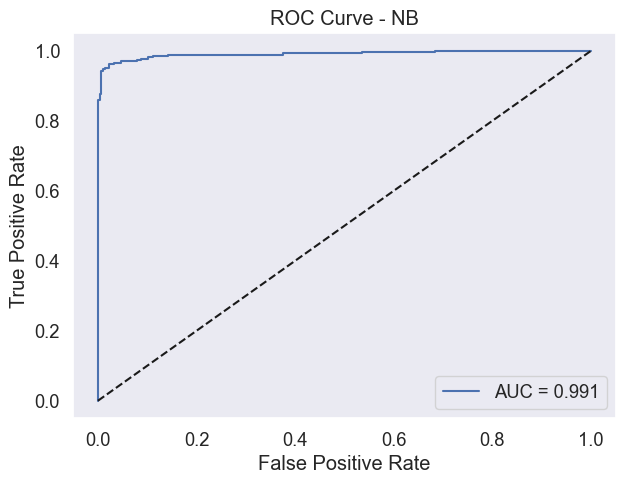

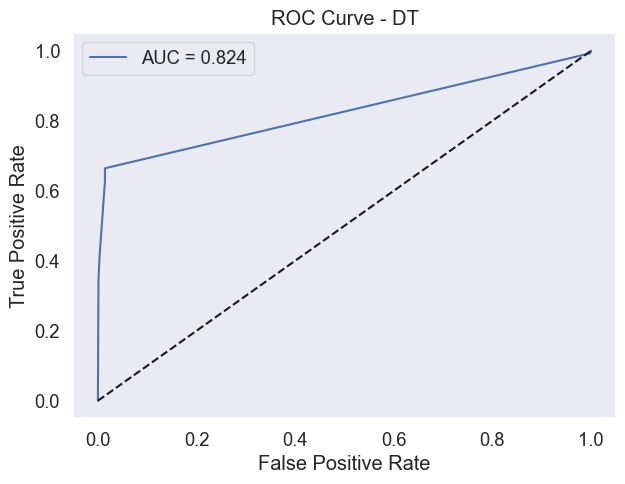

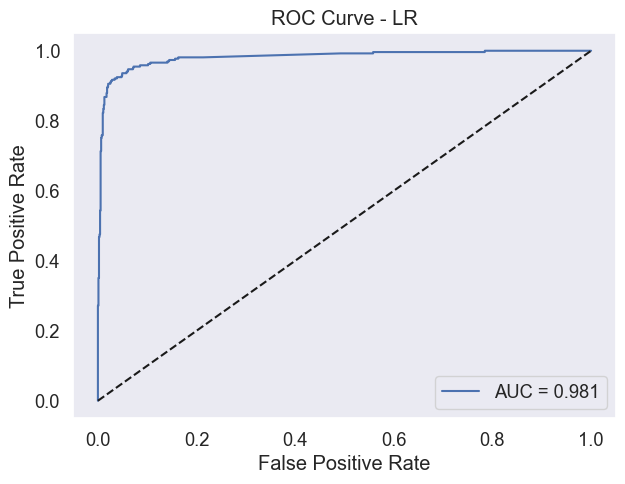

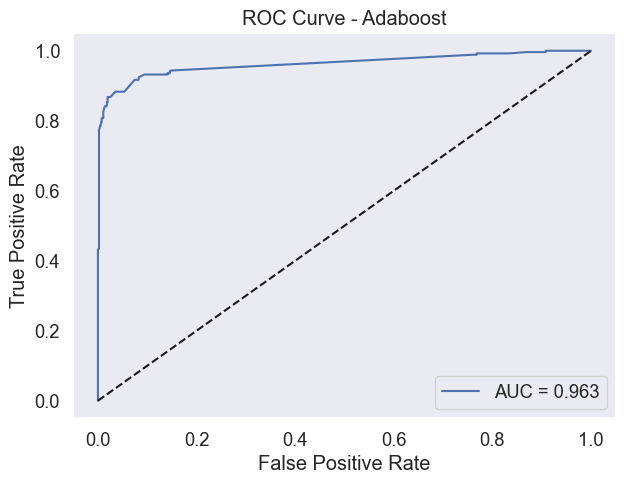

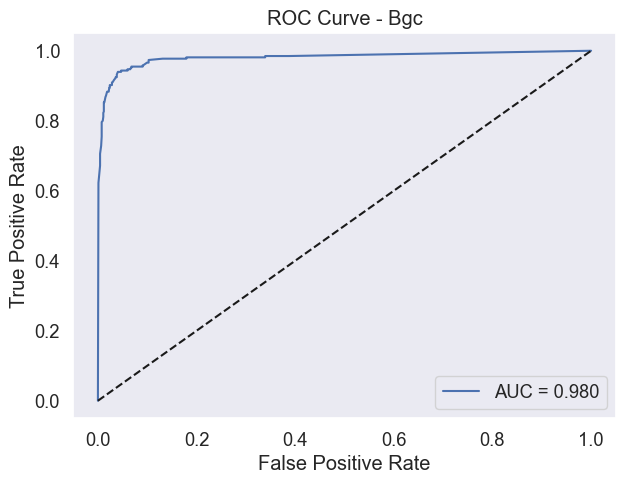

In [43]:
for model_name in clfs.keys():
    fpr = fprs[model_name]
    tpr = tprs[model_name]
    auc_score = auc_scores[list(clfs.keys()).index(model_name)]

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0,1], [0,1], 'k--')

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid()
    plt.show()


In [44]:
import pandas as pd

results = pd.DataFrame({
    "Model": list(clfs.keys()),
    "Accuracy (Doğruluk)": accuracy_scores,
    "Recall (Duyarlılık)": recall_scores,
    "Specificity (Özgüllük)": specificity_scores,
    "F1 Score": f1_scores
})

print("\n=== MODELLERİN DEĞERLENDİRME TABLOSU ===")

styled_results = results.style.set_table_styles(
    [
        {"selector": "th", 
         "props": [("color", "white"), 
                   ("background-color", "#0800FF"), 
                   ("font-weight", "bold"),
                   ("text-align", "center")]}
    ]
).set_properties(**{
    "text-align": "center",
    "font-size": "12pt"
}).set_caption("Model Performans Tablosu")

styled_results



=== MODELLERİN DEĞERLENDİRME TABLOSU ===


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7437 - loss: 0.5580 - val_accuracy: 0.8834 - val_loss: 0.2572
Epoch 2/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9499 - loss: 0.1777 - val_accuracy: 0.9735 - val_loss: 0.1002
Epoch 3/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9830 - loss: 0.0647 - val_accuracy: 0.9703 - val_loss: 0.0980
Epoch 4/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9887 - loss: 0.0373 - val_accuracy: 0.9682 - val_loss: 0.1069
Epoch 5/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9703 - val_loss: 0.1088
Epoch 6/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.9714 - val_loss: 0.1198
Epoch 7/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.9714 - val_loss: 0.1251
Epoch 8/120
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9970 - loss: 0.0110 - val_accu

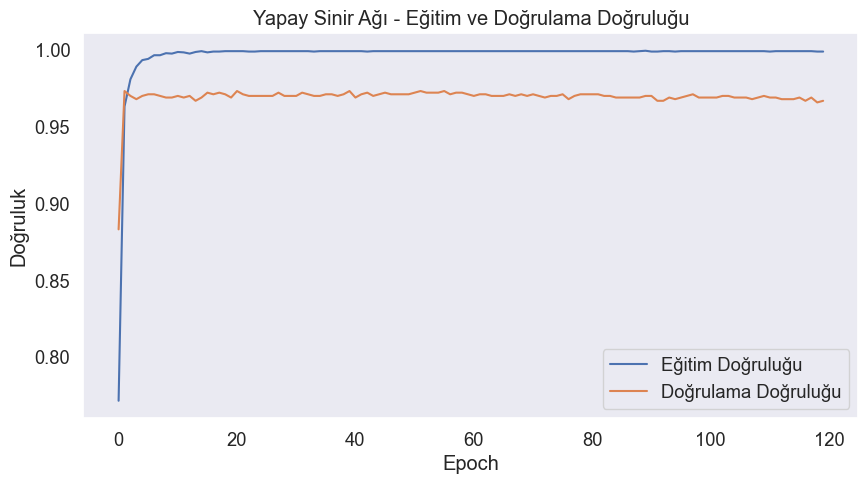

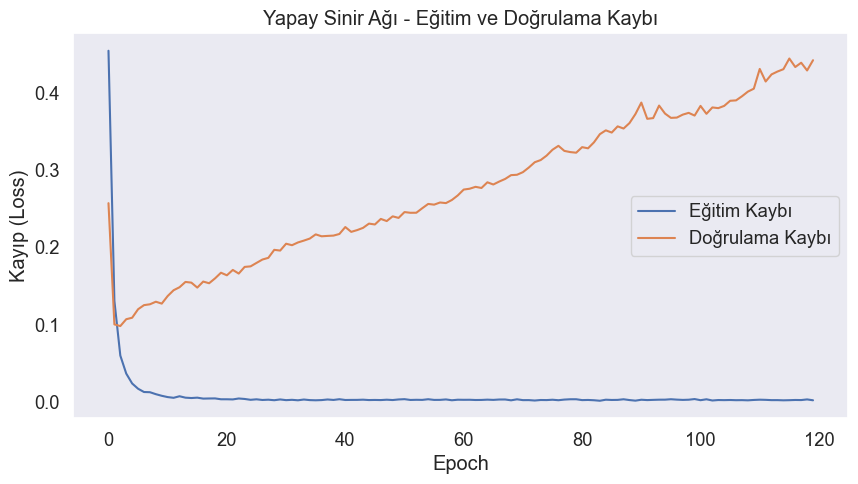

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]

ann = Sequential()
ann.add(Dense(256, activation='relu', input_dim=input_dim))
ann.add(Dropout(0.7))
ann.add(Dense(128, activation='relu'))
ann.add(Dropout(0.7))
ann.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)

ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = ann.fit(
    X_train, y_train,
    epochs=120,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


# Eğitim Doğruluğu Grafiği
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Yapay Sinir Ağı - Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid()
plt.show()

# Eğitim Kaybı Grafiği
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Yapay Sinir Ağı - Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp (Loss)')
plt.legend()
plt.grid()
plt.show()



37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix (ANN):
[[901  13]
 [ 21 244]]


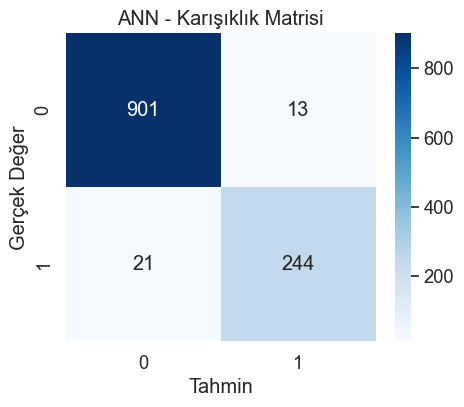

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       914
           1       0.95      0.92      0.93       265

    accuracy                           0.97      1179
   macro avg       0.96      0.95      0.96      1179
weighted avg       0.97      0.97      0.97      1179



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ANN Tahminleri
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype("int32")  # 0/1'a çevirme

# Confusion Matrix
cm_ann = confusion_matrix(y_test, y_pred_ann)

print("Confusion Matrix (ANN):")
print(cm_ann)

# Görsel çizim
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues")
plt.title("ANN - Karışıklık Matrisi")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.show()
print(classification_report(y_test, y_pred_ann))



**K-Fold ile Eğitim**


In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'Adaboost': abc,
    'Bagging': bc
}

all_results = {}      
all_cms = {}    


In [48]:
from sklearn.metrics import roc_curve, auc

def get_scores_for_roc(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    if hasattr(model, "decision_function"):
        return model.decision_function(X)
    return None


In [ ]:
all_results = {}      
all_cms = {}        

for model_name, model in models.items():

    print("\n" + "="*80)
    print(f"📌 MODEL: {model_name}")
    print("="*80)

    fold_cms = []        
    fold_reports = []     
    fold_scores = []      
    fold_rocs = []        
    fold_aucs = []        

    fold_idx = 1

    for train_idx, test_idx in kfold.split(X):

        X_train_k, X_test_k = X[train_idx], X[test_idx]
        y_train_k, y_test_k = y[train_idx], y[test_idx]

        model.fit(X_train_k, y_train_k)

        y_pred = model.predict(X_test_k)

        cm = confusion_matrix(y_test_k, y_pred)
        fold_cms.append(cm)

        print(f"\n🟦 Fold {fold_idx} CM:\n{cm}")

        report_dict = classification_report(y_test_k, y_pred, output_dict=True)
        fold_reports.append(report_dict)

        print(f"\n🔸 Fold {fold_idx} Classification Report:\n")
        print(classification_report(y_test_k, y_pred))

        # Accuracy
        fold_scores.append(accuracy_score(y_test_k, y_pred))

        # ROC + AUC
        y_score = get_scores_for_roc(model, X_test_k)

        if y_score is not None:
            fpr, tpr, _ = roc_curve(y_test_k, y_score)
            roc_auc = auc(fpr, tpr)

            fold_rocs.append((fpr, tpr))
            fold_aucs.append(roc_auc)

            print(f"🔹 Fold {fold_idx} AUC: {roc_auc:.4f}")
        else:
            print(f"⚠ ROC desteklenmiyor (Fold {fold_idx})")
            fold_rocs.append(None)
            fold_aucs.append(None)

        fold_idx += 1

    all_results[model_name] = {
        "cms": fold_cms,
        "reports": fold_reports,
        "scores": fold_scores,
        "rocs": fold_rocs,
        "aucs": fold_aucs
    }

    all_cms[model_name] = fold_cms



📌 MODEL: SVC

🟦 Fold 1 CM:
[[862  14]
 [ 18 285]]

🔸 Fold 1 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       876
           1       0.95      0.94      0.95       303

    accuracy                           0.97      1179
   macro avg       0.97      0.96      0.96      1179
weighted avg       0.97      0.97      0.97      1179

🔹 Fold 1 AUC: 0.9931

🟦 Fold 2 CM:
[[921   2]
 [ 22 234]]

🔸 Fold 2 Classification Report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       923
           1       0.99      0.91      0.95       256

    accuracy                           0.98      1179
   macro avg       0.98      0.96      0.97      1179
weighted avg       0.98      0.98      0.98      1179

🔹 Fold 2 AUC: 0.9862

🟦 Fold 3 CM:
[[901   6]
 [ 20 252]]

🔸 Fold 3 Classification Report:

              precision    recall  f1-score   support

           0       0.9

d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟦 Fold 1 CM:
[[862  14]
 [ 41 262]]

🔸 Fold 1 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       876
           1       0.95      0.86      0.91       303

    accuracy                           0.95      1179
   macro avg       0.95      0.92      0.94      1179
weighted avg       0.95      0.95      0.95      1179

🔹 Fold 1 AUC: 0.9704


d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟦 Fold 2 CM:
[[913  10]
 [ 32 224]]

🔸 Fold 2 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       923
           1       0.96      0.88      0.91       256

    accuracy                           0.96      1179
   macro avg       0.96      0.93      0.95      1179
weighted avg       0.96      0.96      0.96      1179

🔹 Fold 2 AUC: 0.9717


d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟦 Fold 3 CM:
[[892  15]
 [ 33 239]]

🔸 Fold 3 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       907
           1       0.94      0.88      0.91       272

    accuracy                           0.96      1179
   macro avg       0.95      0.93      0.94      1179
weighted avg       0.96      0.96      0.96      1179

🔹 Fold 3 AUC: 0.9616


d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟦 Fold 4 CM:
[[902  10]
 [ 33 233]]

🔸 Fold 4 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       912
           1       0.96      0.88      0.92       266

    accuracy                           0.96      1178
   macro avg       0.96      0.93      0.95      1178
weighted avg       0.96      0.96      0.96      1178

🔹 Fold 4 AUC: 0.9780


d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



🟦 Fold 5 CM:
[[888  10]
 [ 47 233]]

🔸 Fold 5 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       898
           1       0.96      0.83      0.89       280

    accuracy                           0.95      1178
   macro avg       0.95      0.91      0.93      1178
weighted avg       0.95      0.95      0.95      1178

🔹 Fold 5 AUC: 0.9550

📌 MODEL: Bagging

🟦 Fold 1 CM:
[[850  26]
 [ 22 281]]

🔸 Fold 1 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       876
           1       0.92      0.93      0.92       303

    accuracy                           0.96      1179
   macro avg       0.95      0.95      0.95      1179
weighted avg       0.96      0.96      0.96      1179

🔹 Fold 1 AUC: 0.9810

🟦 Fold 2 CM:
[[897  26]
 [ 18 238]]

🔸 Fold 2 Classification Report:

              precision    recall  f1-score   support

           0      

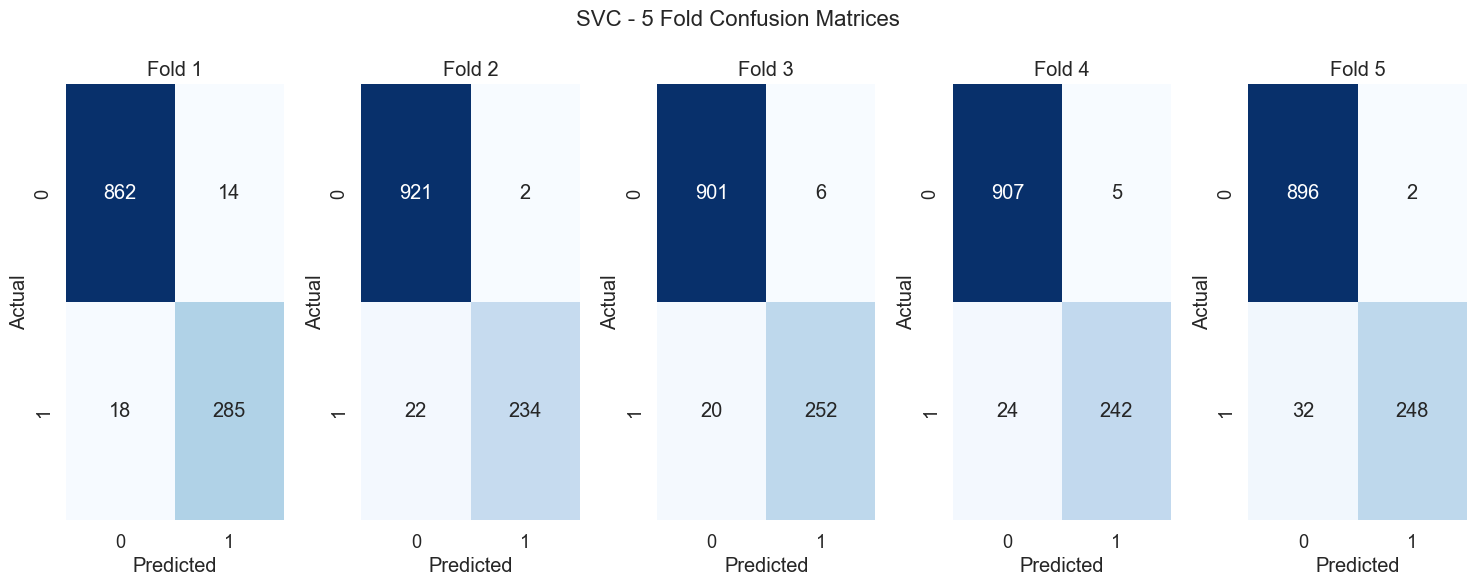

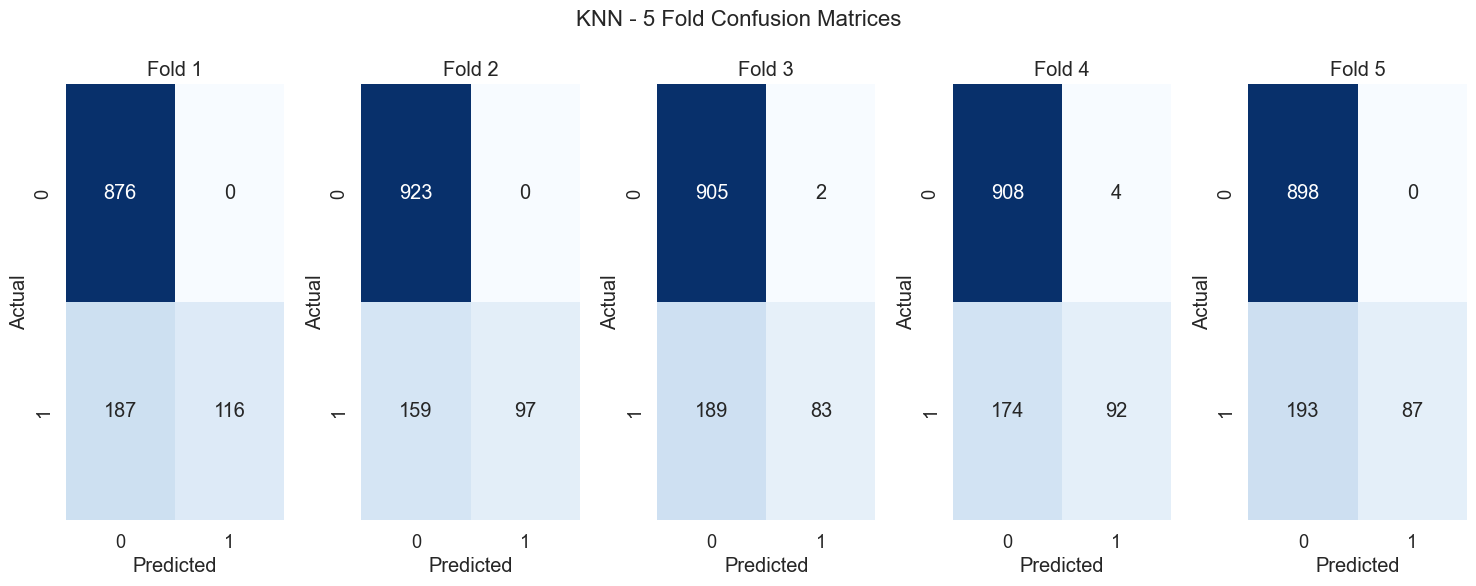

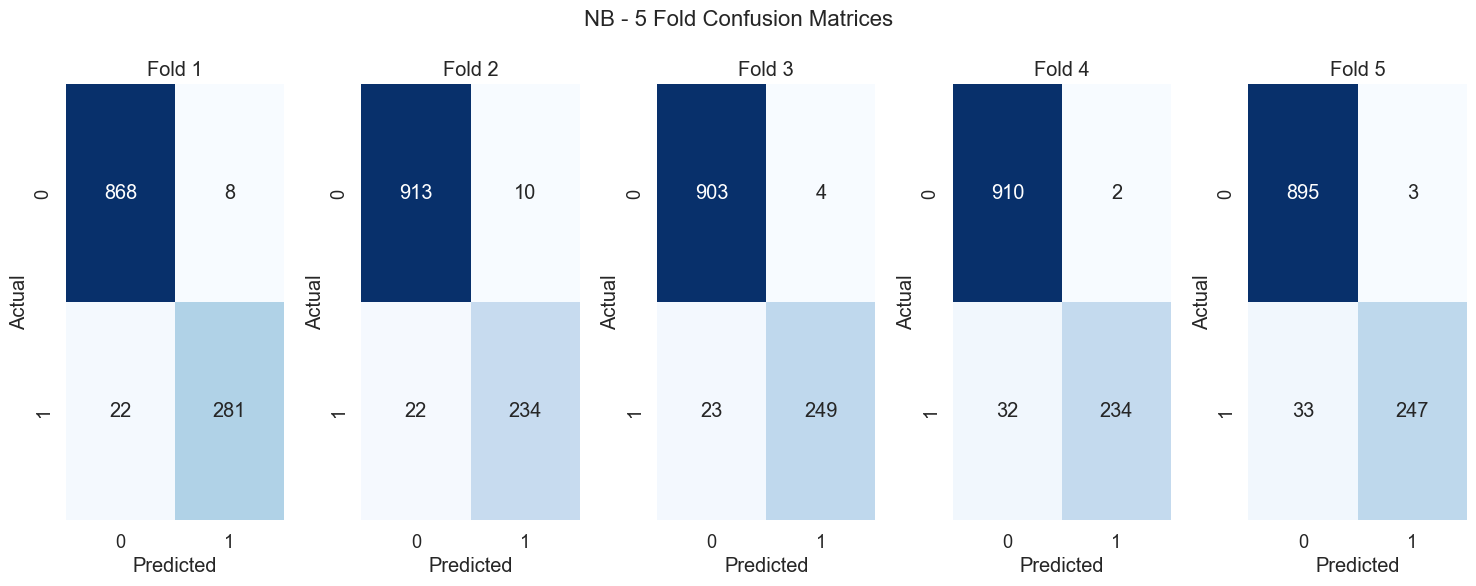

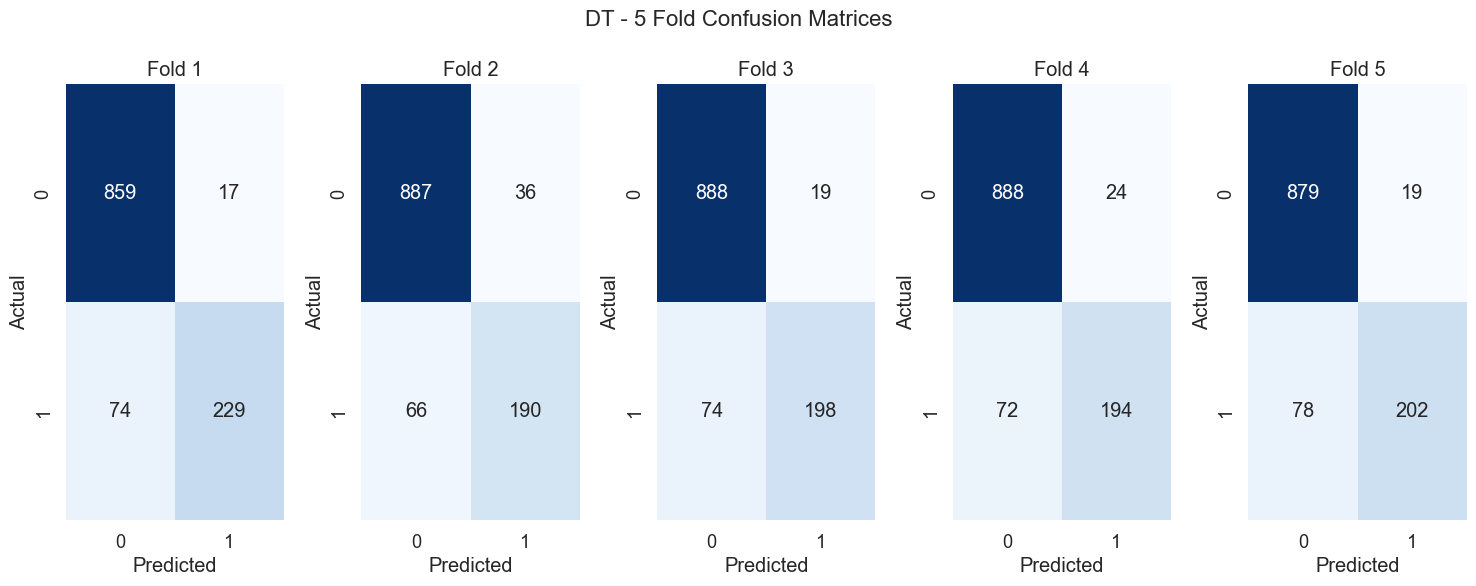

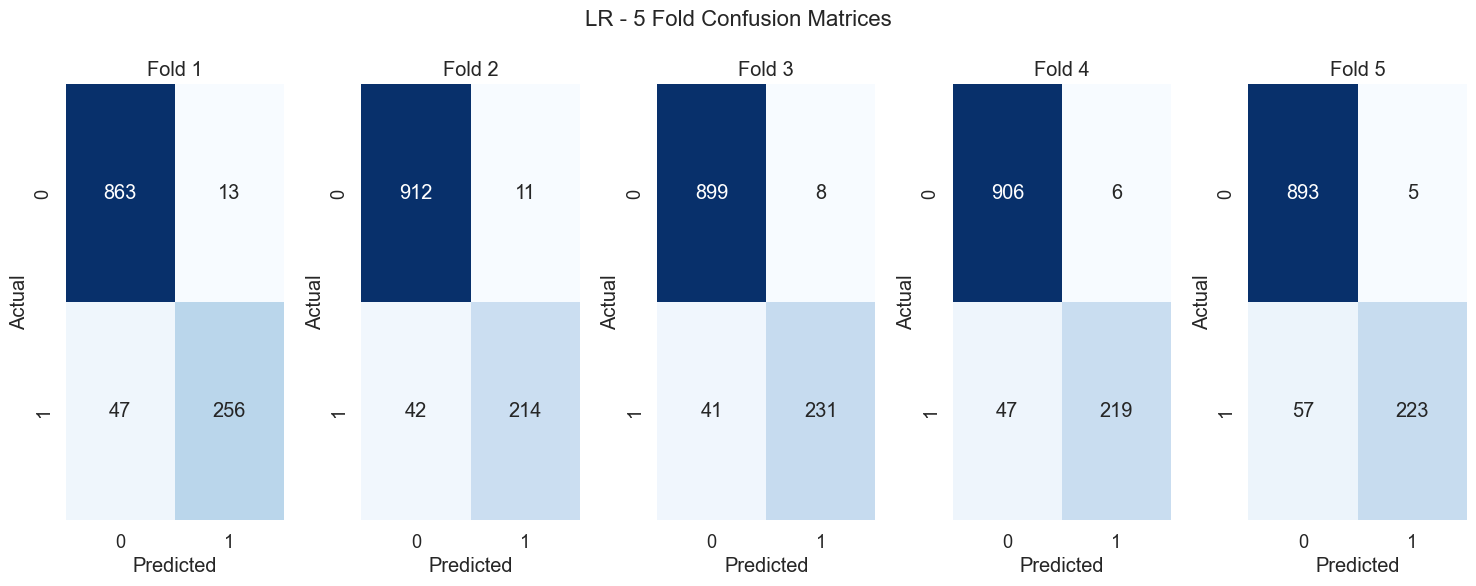

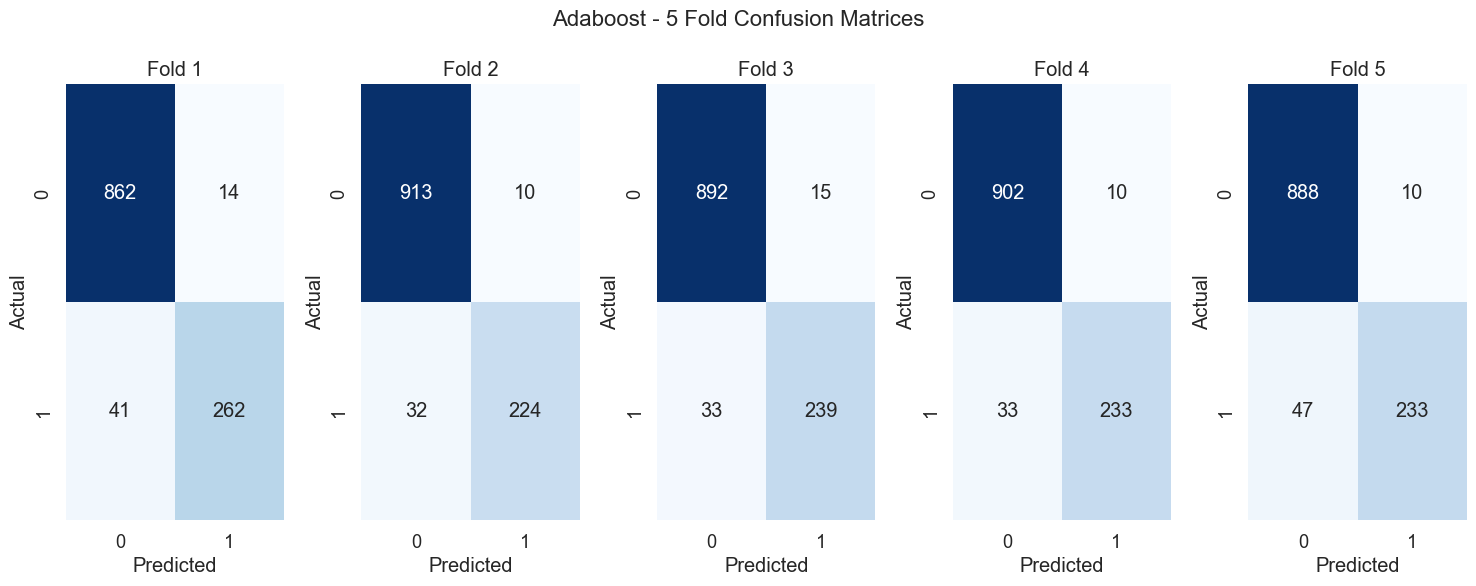

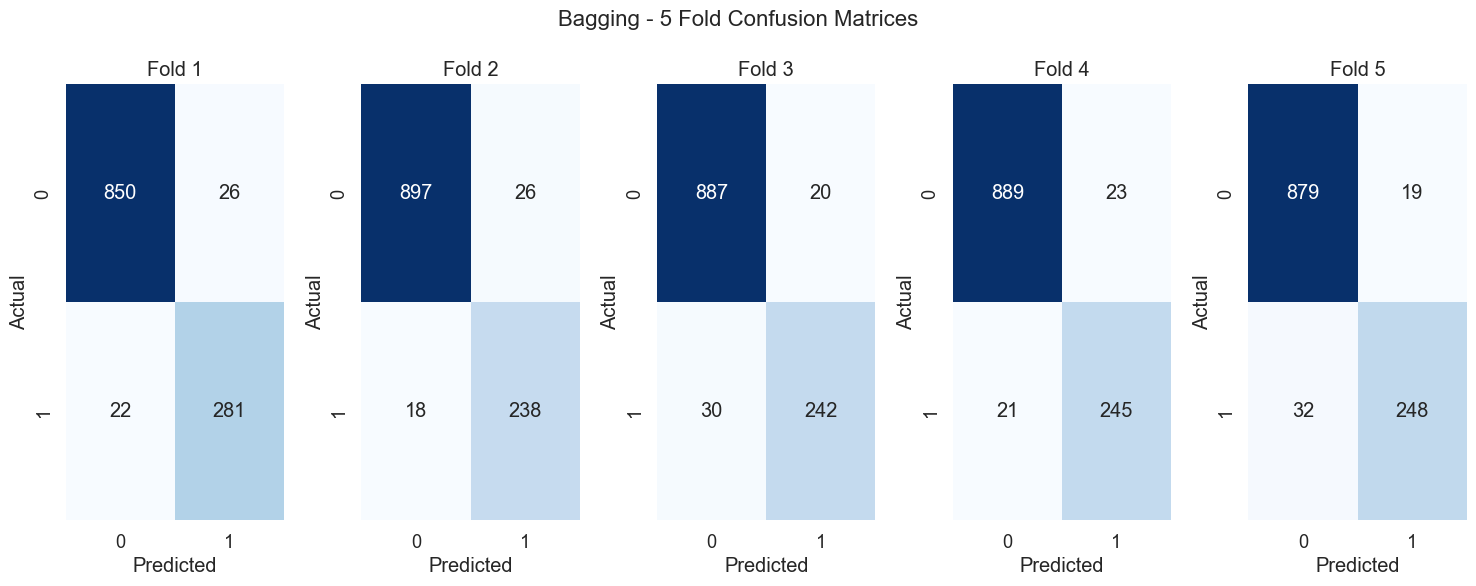

In [50]:
for model_name, cms in all_cms.items():
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"{model_name} - 5 Fold Confusion Matrices", fontsize=16)

    for i, cm in enumerate(cms):
        plt.subplot(1, 5, i+1)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

    plt.tight_layout()
    plt.show()


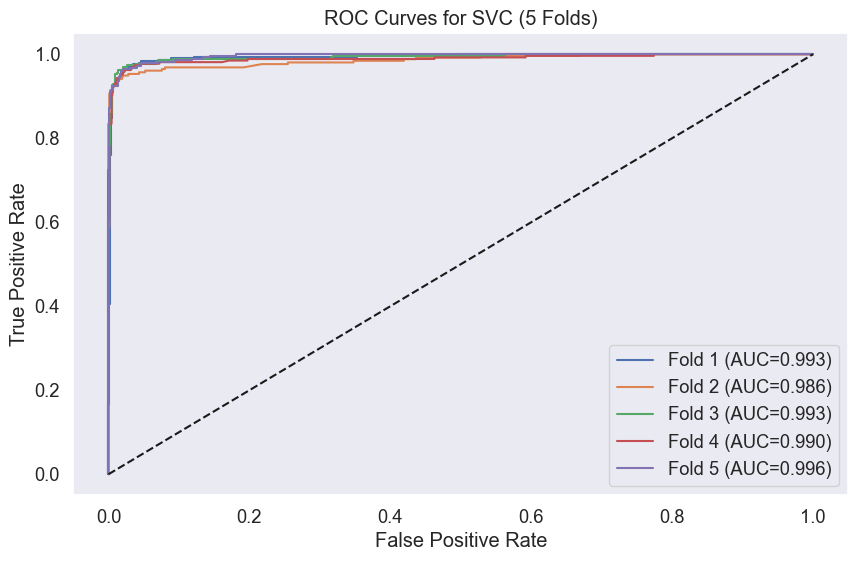

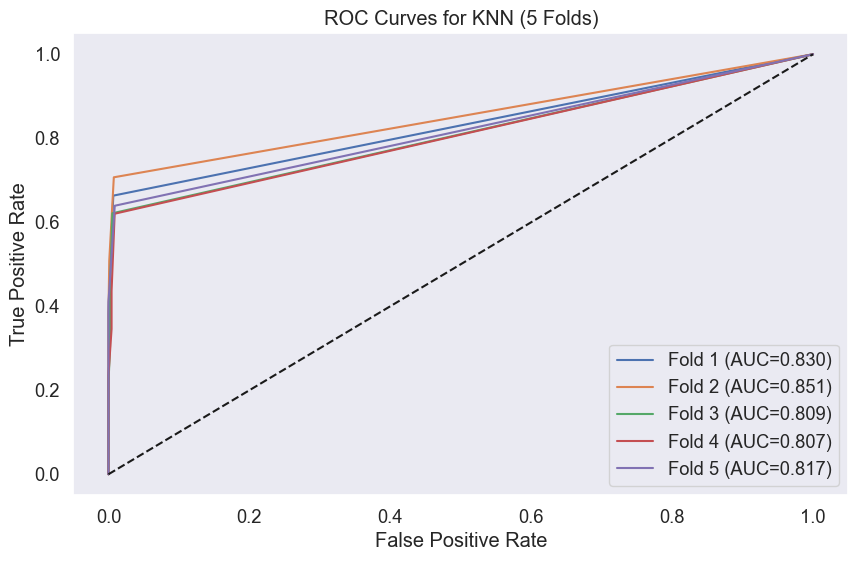

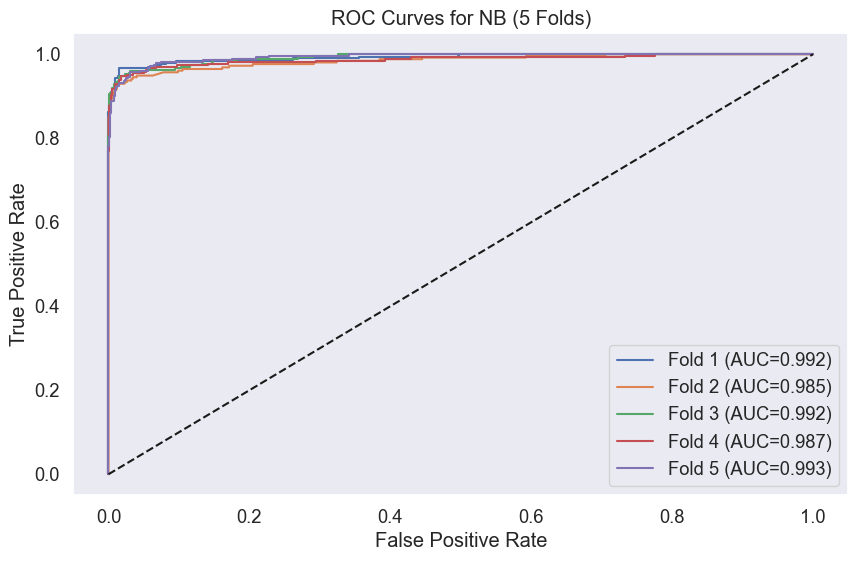

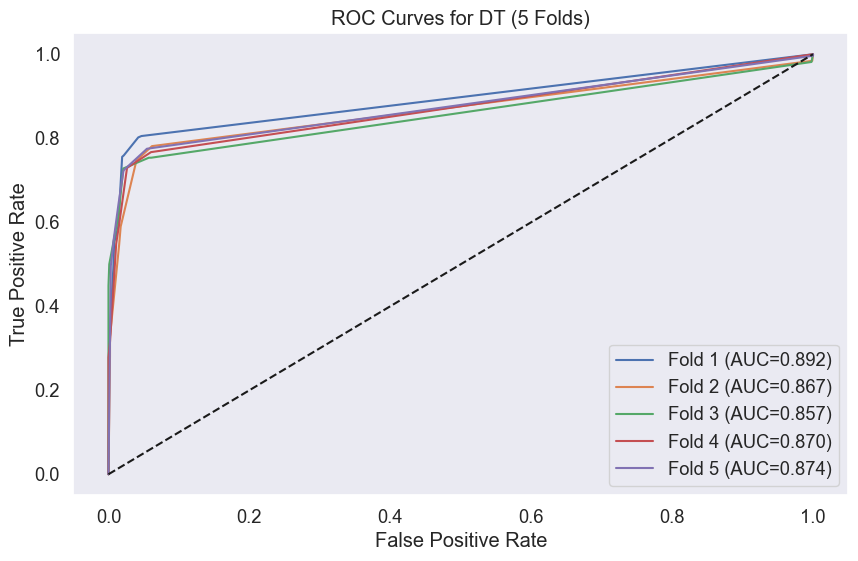

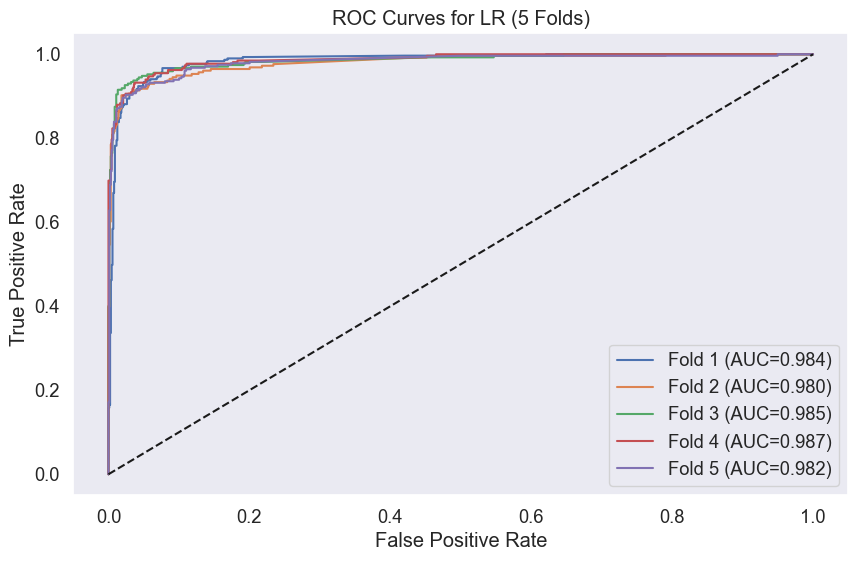

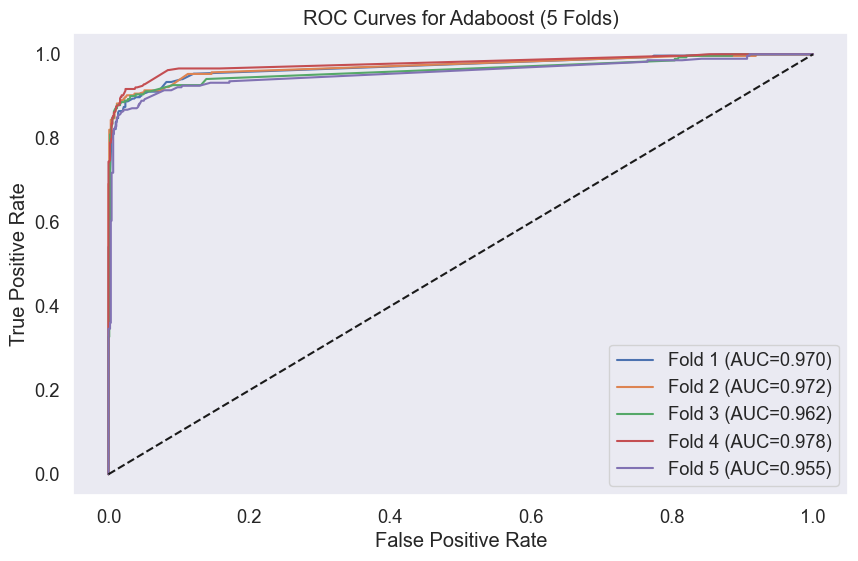

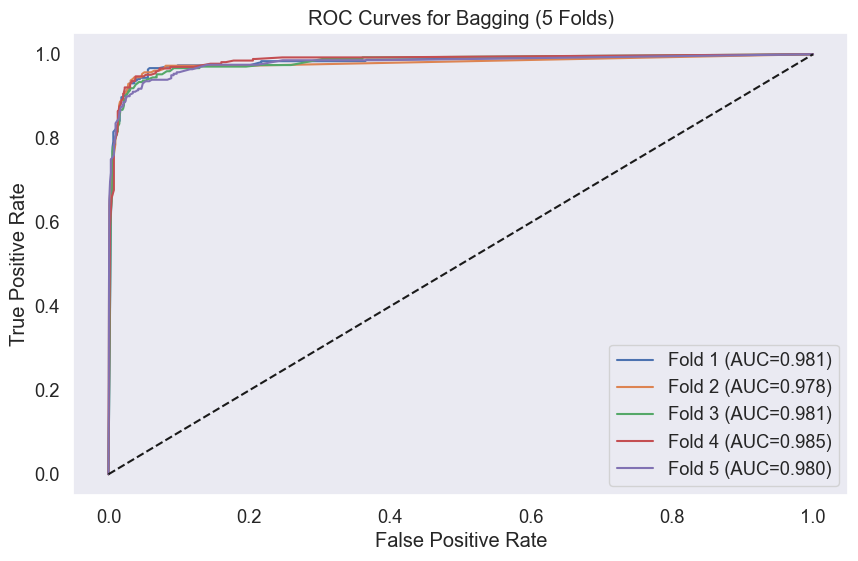

In [51]:
for model_name in all_results.keys():

    plt.figure(figsize=(10,6))
    plt.title(f"ROC Curves for {model_name} (5 Folds)")
    
    fold_aucs = all_results[model_name]["aucs"]
    fold_rocs = all_results[model_name]["rocs"]

    for i, roc_vals in enumerate(fold_rocs):
        if roc_vals is not None:
            fpr, tpr = roc_vals
            plt.plot(fpr, tpr, label=f"Fold {i+1} (AUC={fold_aucs[i]:.3f})")

    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()



In [ ]:
print("\n\n===== 📊 FINAL K-FOLD RESULTS =====\n")

final_summary = []

for model_name, data in all_results.items():
    scores = data["scores"]

    avg_acc = np.mean(scores)
    avg_prec = np.mean([data["reports"][i]["1"]["precision"] for i in range(5)])
    avg_rec  = np.mean([data["reports"][i]["1"]["recall"] for i in range(5)])
    avg_f1   = np.mean([data["reports"][i]["1"]["f1-score"] for i in range(5)])

   
    specificities = []
    for cm in data["cms"]:
        TN = cm[0][0]
        FP = cm[0][1]
        specificity = TN / (TN + FP)
        specificities.append(specificity)

    avg_spec = np.mean(specificities)

    final_summary.append([
        model_name, 
        avg_acc, 
        avg_prec, 
        avg_rec, 
        avg_spec,   
        avg_f1
    ])

final_df = pd.DataFrame(final_summary, 
                         columns=["Model", "Accuracy", "Precision", "Recall", "Specificity", "F1-score"])

styled_results_k = final_df.style.set_table_styles(
    [
        {"selector": "th", 
         "props": [("color", "white"), 
                   ("background-color", "#0800FF"), 
                   ("font-weight", "bold"),
                   ("text-align", "center")]}
    ]
).set_properties(**{
    "text-align": "center",
    "font-size": "12pt"
}).set_caption("Model Performans Tablosu")

styled_results_k




===== 📊 FINAL K-FOLD RESULTS =====



**Kfold ile YSA Egitim**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_ann(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.7),
        Dense(64, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



===================== FOLD 1 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[865  11]
 [106 197]]


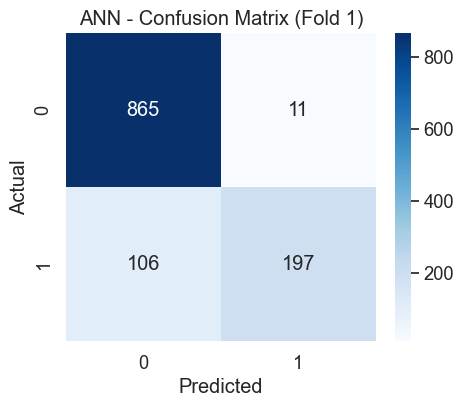

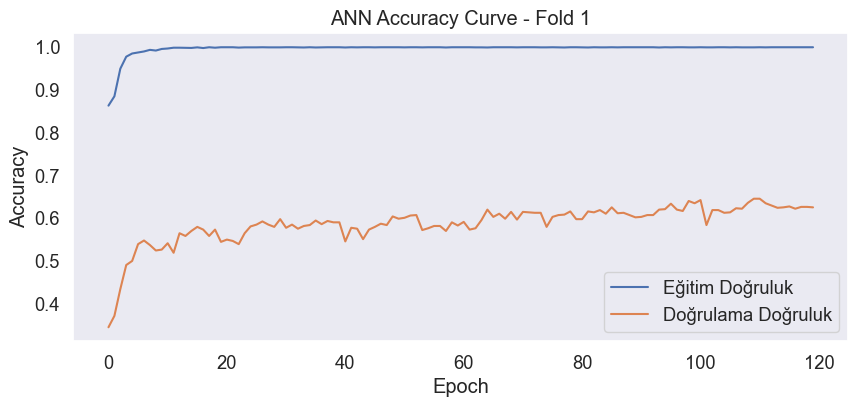

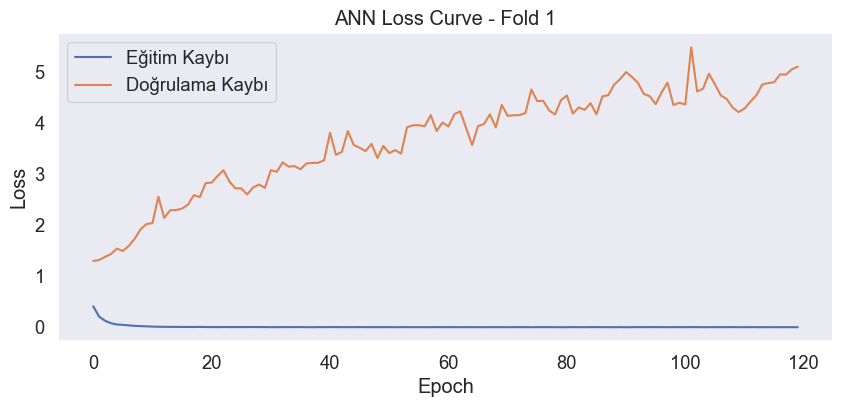


===================== FOLD 2 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[916   7]
 [110 146]]


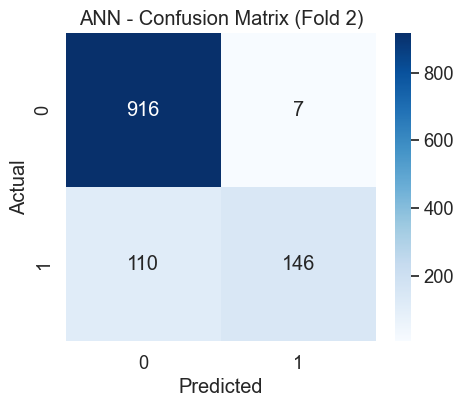

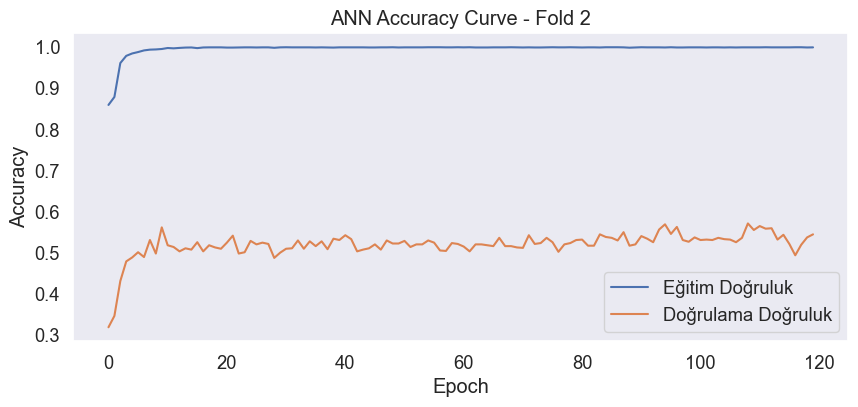

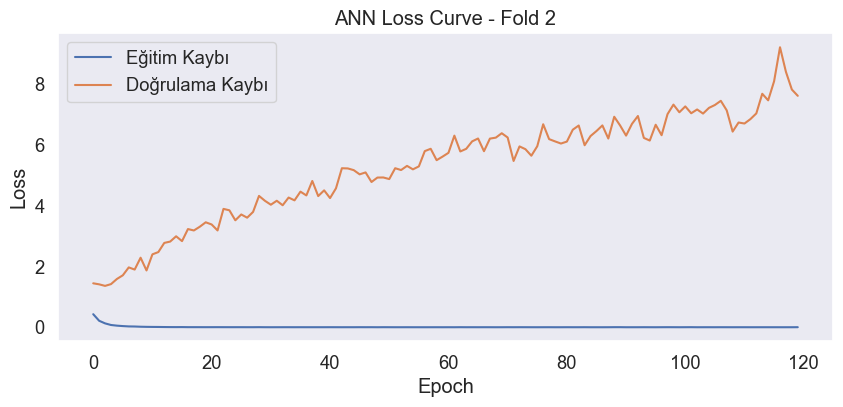


===================== FOLD 3 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[898   9]
 [103 169]]


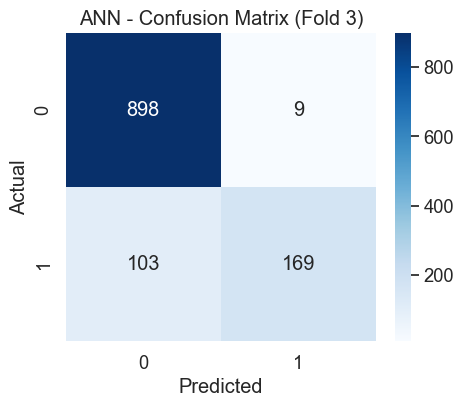

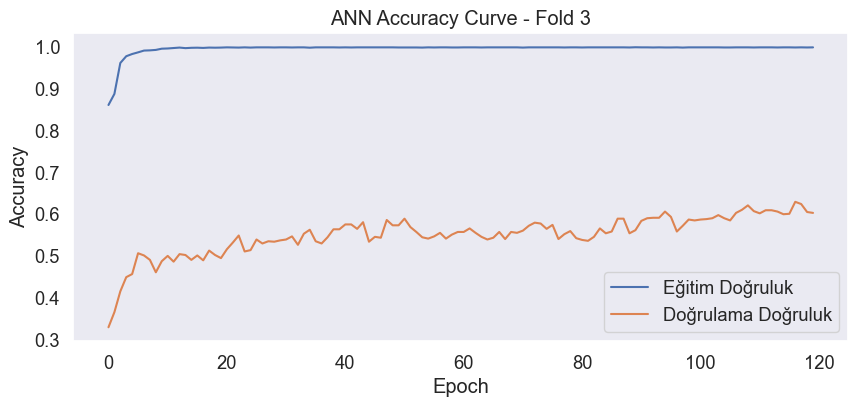

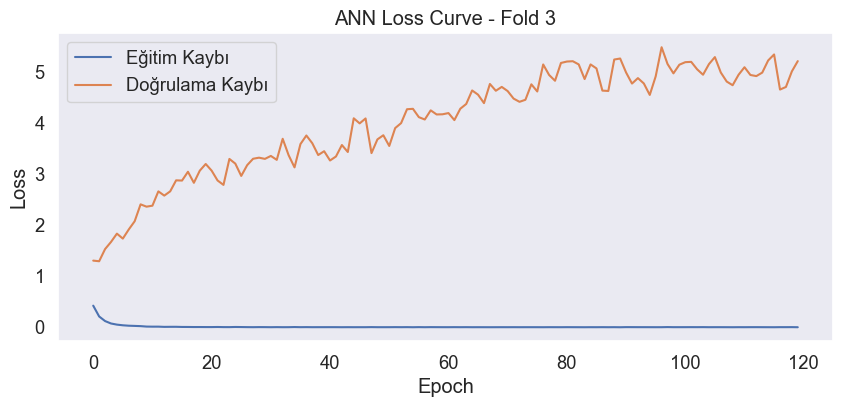


===================== FOLD 4 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[903   9]
 [115 151]]


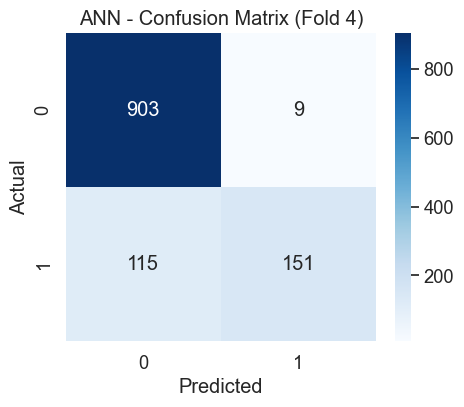

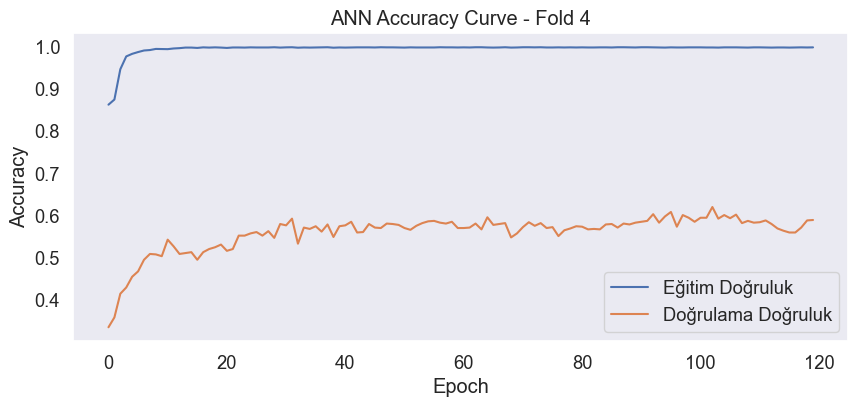

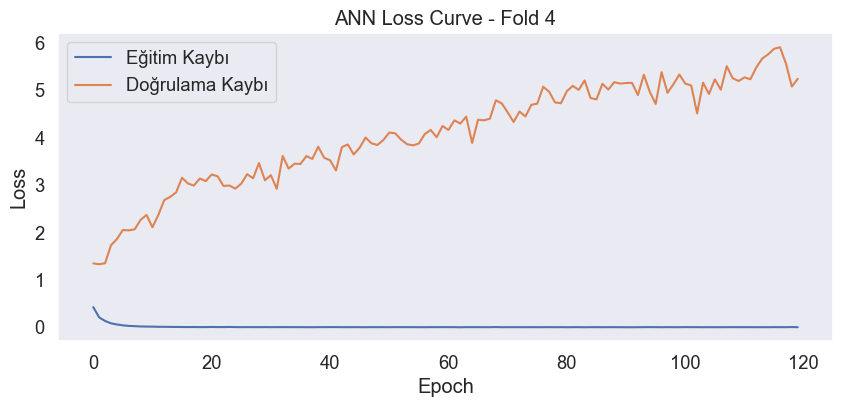


===================== FOLD 5 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[889   9]
 [129 151]]


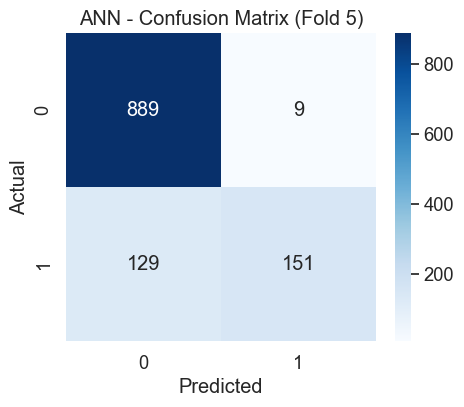

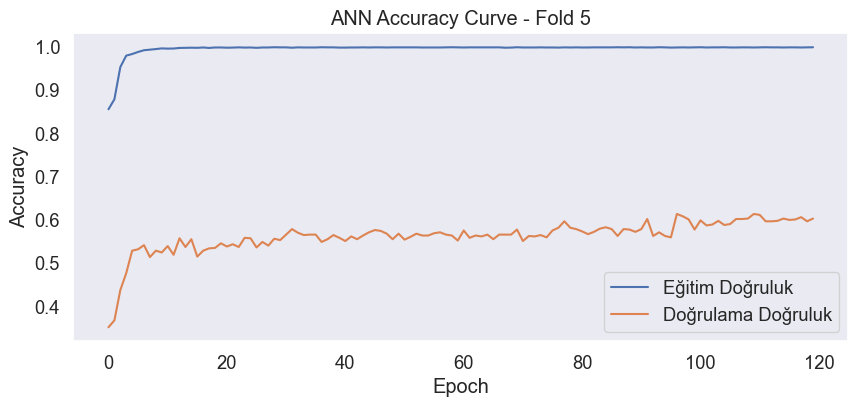

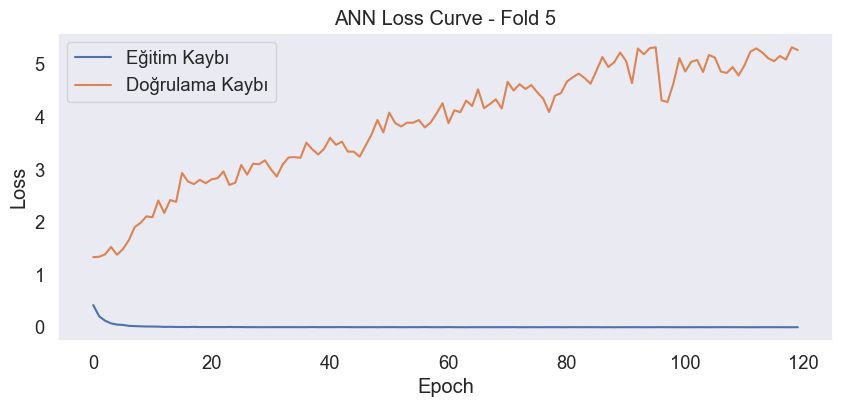

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
input_dim = X.shape[1]

ann_results = {
    "cms": [],
    "histories": [],
    "y_tests": [],
    "y_preds": []
}

for train_idx, test_idx in kfold.split(X):

    print(f"\n===================== FOLD {fold_no} =====================")

    X_train_k, X_test_k = X[train_idx], X[test_idx]
    y_train_k, y_test_k = y[train_idx], y[test_idx]

    ann = build_ann(input_dim)

    history = ann.fit(
        X_train_k, y_train_k,
        epochs=120,
        batch_size=32,
        validation_split=0.2,
        verbose=0  
    )

    ann_results["histories"].append(history)



    
    y_pred = (ann.predict(X_test_k) > 0.5).astype("int32")

    # CM
    cm = confusion_matrix(y_test_k, y_pred)
    ann_results["cms"].append(cm)
    ann_results["y_tests"].append(y_test_k)
    ann_results["y_preds"].append(y_pred)
    ann_results["histories"].append(history)

    print("\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"ANN - Confusion Matrix (Fold {fold_no})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(history.history["accuracy"], label="Eğitim Doğruluk")
    plt.plot(history.history["val_accuracy"], label="Doğrulama Doğruluk")
    plt.title(f"ANN Accuracy Curve - Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(history.history["loss"], label="Eğitim Kaybı")
    plt.plot(history.history["val_loss"], label="Doğrulama Kaybı")
    plt.title(f"ANN Loss Curve - Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    fold_no += 1



===================== FOLD 1 =====================
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[862  14]
 [105 198]]


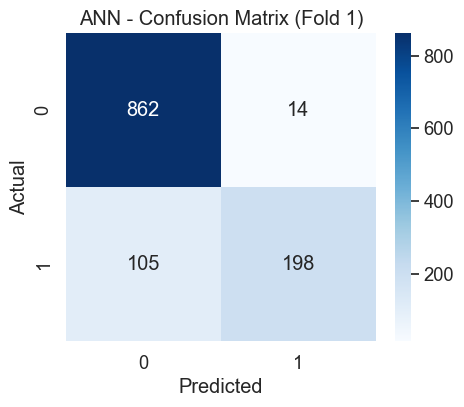

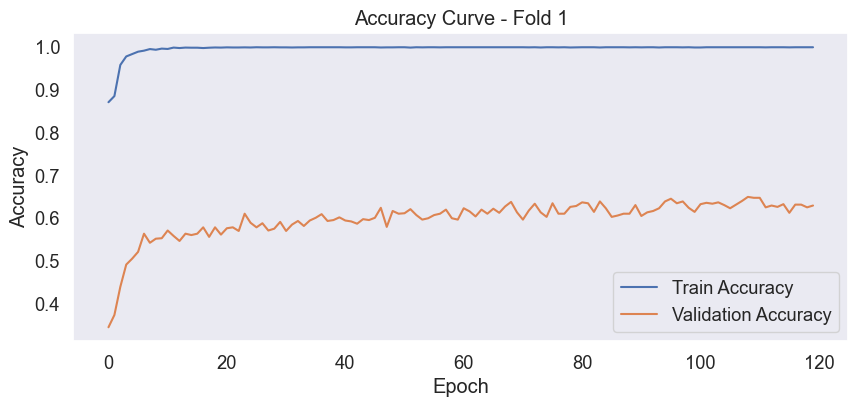

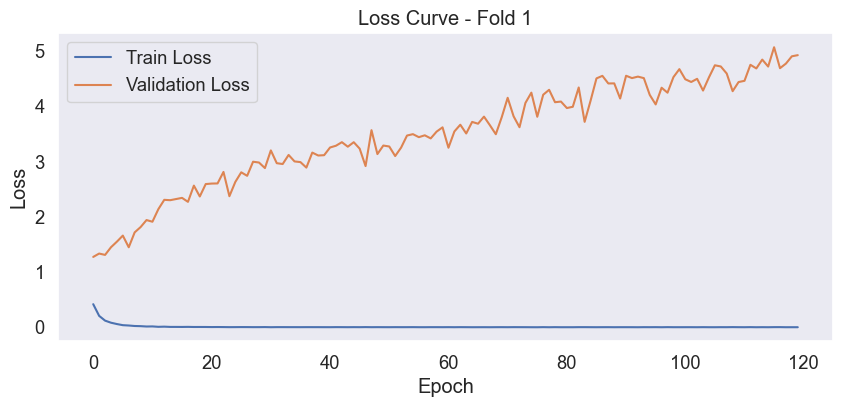


===================== FOLD 2 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[915   8]
 [103 153]]


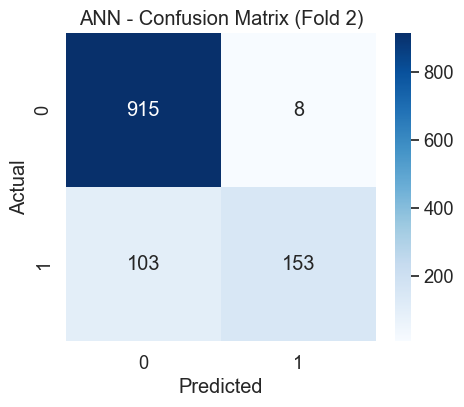

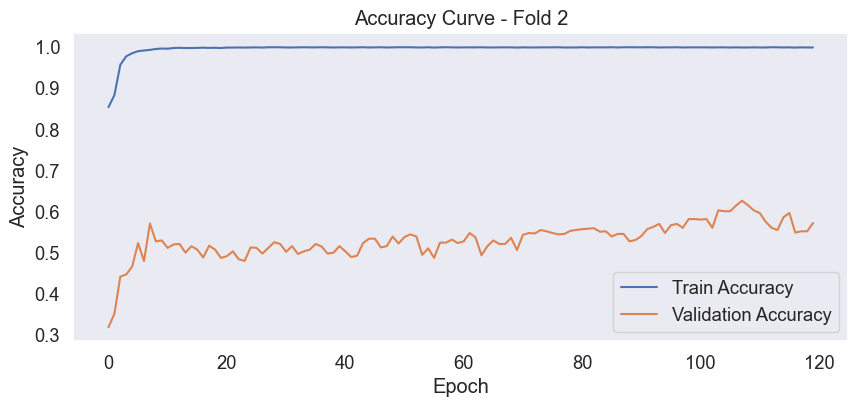

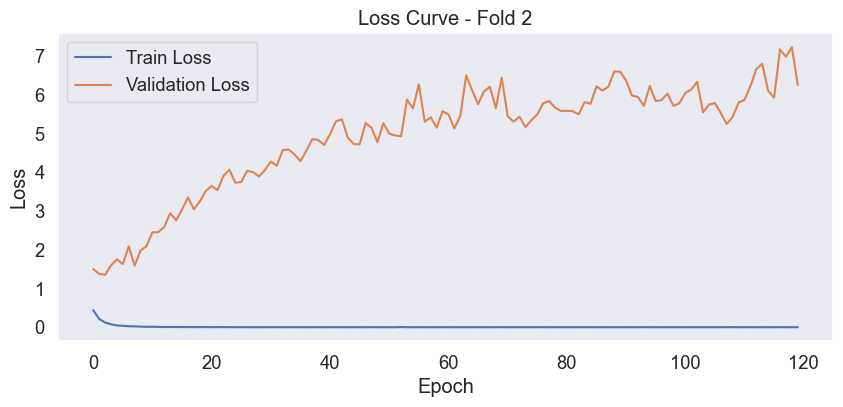


===================== FOLD 3 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Confusion Matrix:
[[897  10]
 [110 162]]


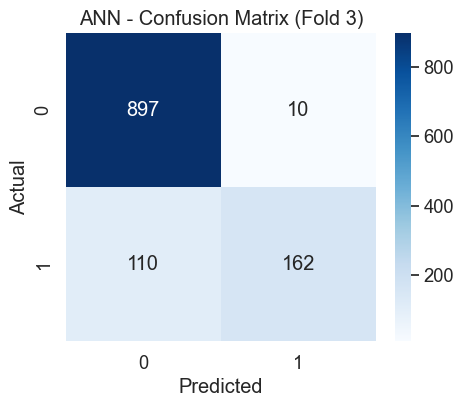

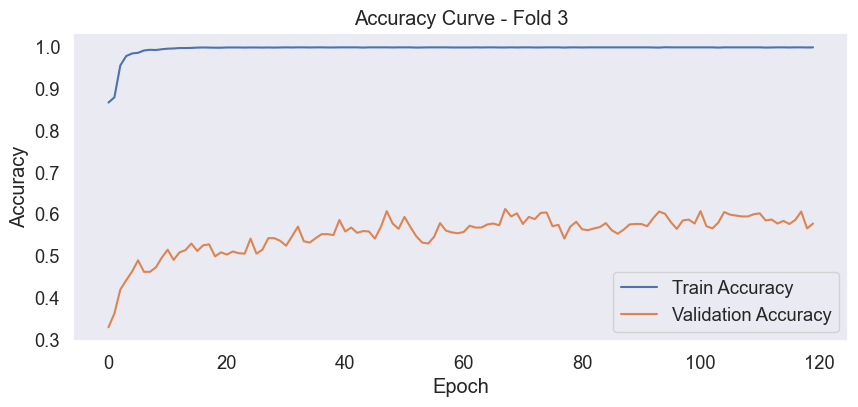

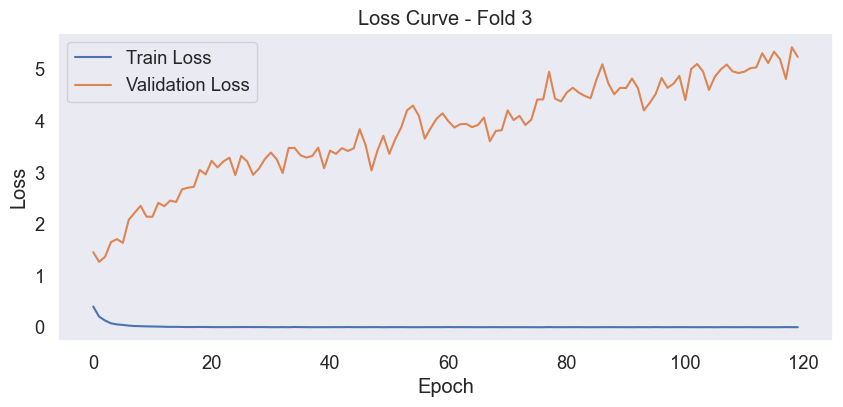


===================== FOLD 4 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[904   8]
 [120 146]]


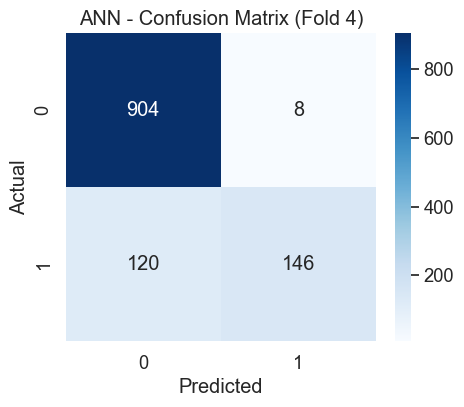

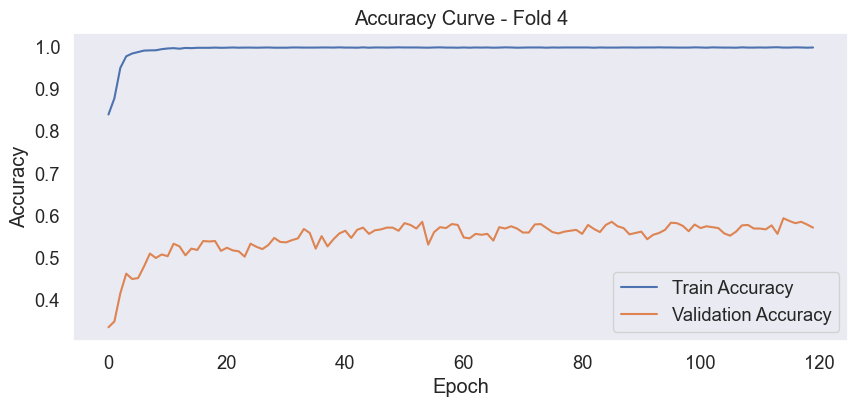

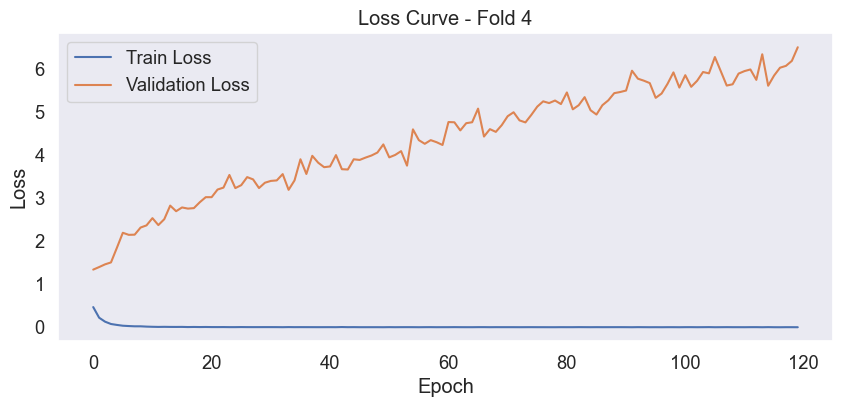


===================== FOLD 5 =====================


d:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Confusion Matrix:
[[890   8]
 [143 137]]


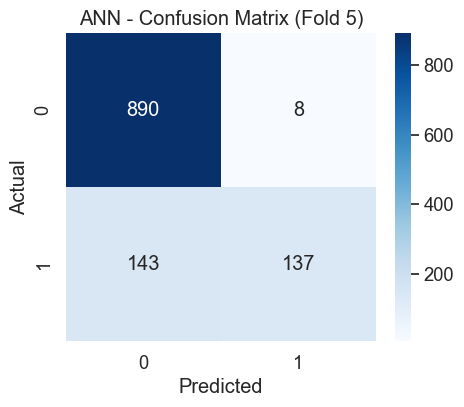

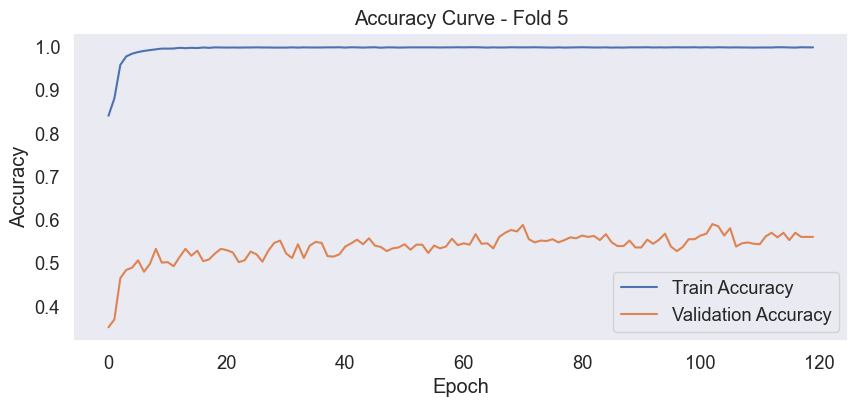

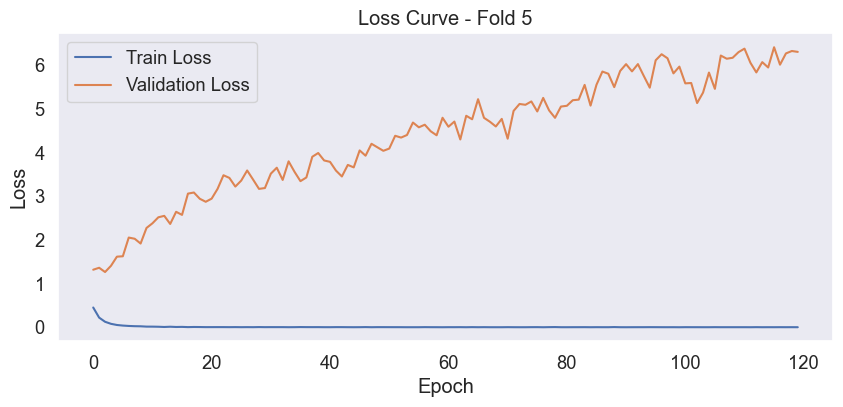

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
input_dim = X.shape[1]

ann_results = {
    "cms": [],
    "histories": [],
    "y_tests": [],
    "y_preds": []
}

for train_idx, test_idx in kfold.split(X):

    print(f"\n===================== FOLD {fold_no} =====================")

    X_train_k, X_test_k = X[train_idx], X[test_idx]
    y_train_k, y_test_k = y[train_idx], y[test_idx]

    ann = build_ann(input_dim)

    history = ann.fit(
        X_train_k, y_train_k,
        epochs=120,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    ann_results["histories"].append(history)

    
    y_pred = (ann.predict(X_test_k) > 0.5).astype("int32")

    # Confusion Matrix
    cm = confusion_matrix(y_test_k, y_pred)
    ann_results["cms"].append(cm)

    print("\nConfusion Matrix:")
    print(cm)

    # ===================== عرض CM =====================
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"ANN - Confusion Matrix (Fold {fold_no})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ===================== عرض Accuracy Curve =====================
    plt.figure(figsize=(10,4))
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title(f"Accuracy Curve - Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

    # ===================== عرض Loss Curve =====================
    plt.figure(figsize=(10,4))
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"Loss Curve - Fold {fold_no}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

    fold_no += 1


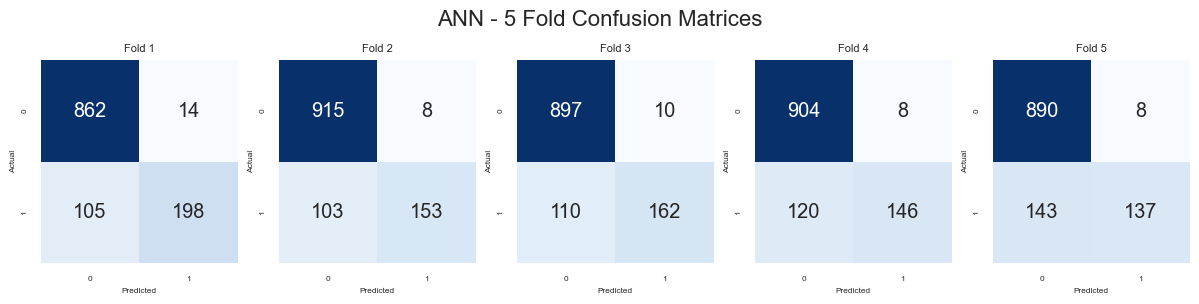

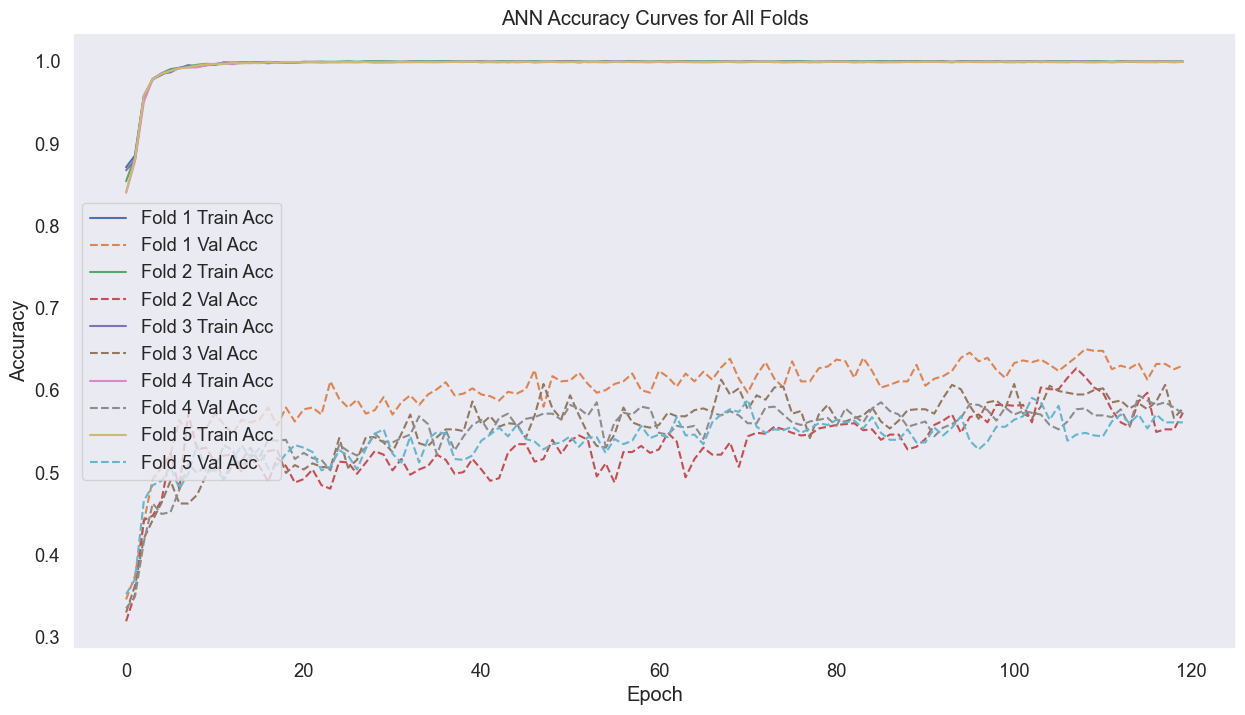

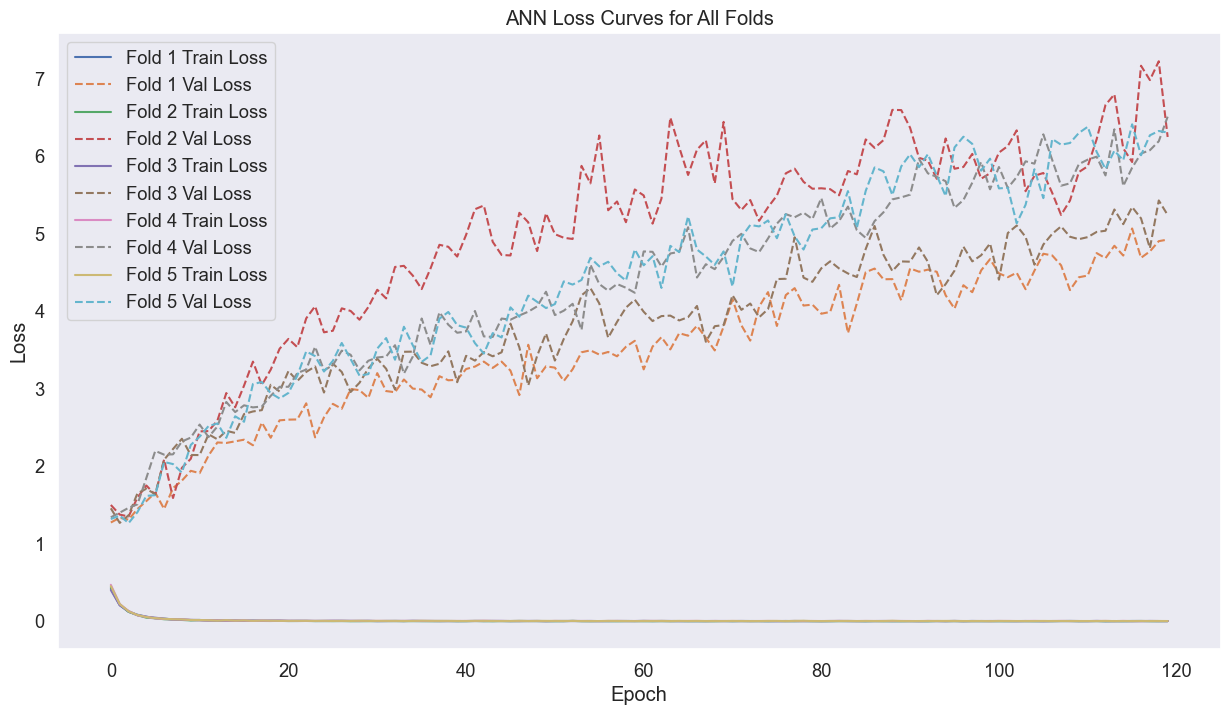

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# ===========================

plt.figure(figsize=(12, 3))   # ← حجم صغير ويحتوي 5 قي مربع واحد
plt.suptitle("ANN - 5 Fold Confusion Matrices", fontsize=16)

for i, cm in enumerate(ann_results["cms"]):
    plt.subplot(1, 5, i + 1)   # ← صف واحد و5 أعمدة

    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
    )

    plt.title(f"Fold {i+1}", fontsize=8)
    plt.xlabel("Predicted", fontsize=6)
    plt.ylabel("Actual", fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.tight_layout(pad=0.5)
plt.show()


# ===========================
# ===========================

plt.figure(figsize=(15, 8))
for i, hist in enumerate(ann_results["histories"]):
    plt.plot(hist.history["accuracy"], label=f"Fold {i+1} Train Acc")
    plt.plot(hist.history["val_accuracy"], linestyle="--", label=f"Fold {i+1} Val Acc")

plt.title("ANN Accuracy Curves for All Folds")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# ===========================
# ===========================

plt.figure(figsize=(15, 8))
for i, hist in enumerate(ann_results["histories"]):
    plt.plot(hist.history["loss"], label=f"Fold {i+1} Train Loss")
    plt.plot(hist.history["val_loss"], linestyle="--", label=f"Fold {i+1} Val Loss")

plt.title("ANN Loss Curves for All Folds")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

ann_metrics = {
    "accuracy": [],
    "precision": [],
    "recall": [],
    "specificity": [],
    "f1": [],
    "auc": []
}

fold_no = 1

for i in range(5):

    cm = ann_results["cms"][i]
    tn, fp, fn, tp = cm.ravel()

    specificity = tn / (tn + fp)

    # y_test و y_pred لكل فولد
    y_test_k = y[kfold.split(X)].__next__()[1] if False else None  # نصلحها الآن


In [56]:
for i in range(5):

    y_true = ann_results["y_tests"][i]
    y_pred = ann_results["y_preds"][i]

    cm = ann_results["cms"][i]
    tn, fp, fn, tp = cm.ravel()

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    spec = tn / (tn + fp)
    auc_val = roc_auc_score(y_true, y_pred)

    ann_metrics["accuracy"].append(acc)
    ann_metrics["precision"].append(prec)
    ann_metrics["recall"].append(rec)
    ann_metrics["specificity"].append(spec)
    ann_metrics["f1"].append(f1)
    ann_metrics["auc"].append(auc_val)

    print(f"\n============= FOLD {i+1} RESULTS =============")
    print(f"Accuracy:     {acc:.4f}")
    print(f"Precision:    {prec:.4f}")
    print(f"Recall:       {rec:.4f}")
    print(f"Specificity:  {spec:.4f}")
    print(f"F1-score:     {f1:.4f}")
    print(f"AUC:          {auc_val:.4f}")



============= FOLD 1 RESULTS =============
Accuracy:     0.9008
Precision:    0.9471
Recall:       0.6502
Specificity:  0.9874
F1-score:     0.7710
AUC:          0.8188

============= FOLD 2 RESULTS =============
Accuracy:     0.9008
Precision:    0.9542
Recall:       0.5703
Specificity:  0.9924
F1-score:     0.7139
AUC:          0.7814

============= FOLD 3 RESULTS =============
Accuracy:     0.9050
Precision:    0.9494
Recall:       0.6213
Specificity:  0.9901
F1-score:     0.7511
AUC:          0.8057

============= FOLD 4 RESULTS =============
Accuracy:     0.8947
Precision:    0.9437
Recall:       0.5677
Specificity:  0.9901
F1-score:     0.7089
AUC:          0.7789

============= FOLD 5 RESULTS =============
Accuracy:     0.8829
Precision:    0.9437
Recall:       0.5393
Specificity:  0.9900
F1-score:     0.6864
AUC:          0.7646


In [57]:
print("\n\n====== 📌 ANN K-FOLD FINAL SUMMARY (5 Folds) 📌 ======\n")

print(f"Average Accuracy:     {np.mean(ann_metrics['accuracy']):.4f}")
print(f"Average Precision:    {np.mean(ann_metrics['precision']):.4f}")
print(f"Average Recall:       {np.mean(ann_metrics['recall']):.4f}")
print(f"Average Specificity:  {np.mean(ann_metrics['specificity']):.4f}")
print(f"Average F1-score:     {np.mean(ann_metrics['f1']):.4f}")
print(f"Average AUC:          {np.mean(ann_metrics['auc']):.4f}")




====== 📌 ANN K-FOLD FINAL SUMMARY (5 Folds) 📌 ======

Average Accuracy:     0.8968
Average Precision:    0.9477
Average Recall:       0.5898
Average Specificity:  0.9900
Average F1-score:     0.7263
Average AUC:          0.7899


In [58]:
import numpy as np

avg_scores = {}

for model_name, result in all_results.items():
    avg_scores[model_name] = np.mean(result["scores"])

sorted_models = sorted(avg_scores.items(), key=lambda x: x[1], reverse=True)

print("Model Rankings (Best → Worst):")
for m, s in sorted_models:
    print(f"{m}: {s:.4f}")


best_model = sorted_models[0][0]
second_best = sorted_models[1][0]

print("\n🔶 Best Model:", best_model)
print("🔷 Second Best Model:", second_best)


Model Rankings (Best → Worst):
SVC: 0.9754
NB: 0.9730
Bagging: 0.9598
Adaboost: 0.9584
LR: 0.9530
DT: 0.9187
KNN: 0.8459

🔶 Best Model: SVC
🔷 Second Best Model: NB


In [59]:
all_results["ANN"] = {
    "cms": ann_results["cms"],
    "histories": ann_results["histories"],
    "y_tests": ann_results["y_tests"],
    "y_preds": ann_results["y_preds"],
    "scores": [],     # Accuracy لكل Fold
    "reports": [],    # Classification Reports
    "aucs": []        # AUC لكل Fold
}


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

ann_acc = []
ann_reports = []
ann_aucs = []

for i in range(5):
    y_true = ann_results["y_tests"][i]
    y_pred = ann_results["y_preds"][i]

    acc = accuracy_score(y_true, y_pred)
    ann_acc.append(acc)

    # classification report dictionary
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    ann_reports.append(report_dict)

    # auc
    try:
        auc_val = roc_auc_score(y_true, y_pred)
    except:
        auc_val = None

    ann_aucs.append(auc_val)

all_results["ANN"] = {
    "cms": ann_results["cms"],
    "histories": ann_results["histories"],
    "y_tests": ann_results["y_tests"],
    "y_preds": ann_results["y_preds"],
    "scores": ann_acc,
    "reports": ann_reports,
    "aucs": ann_aucs
}

print("\n🎉 ANN added to all_results successfully!")



🎉 ANN added to all_results successfully!


In [ ]:
import numpy as np

model_performance = []

for model_name, result in all_results.items():
    
    avg_acc = np.mean(result["scores"])

    avg_f1 = np.mean([rep["1"]["f1-score"] for rep in result["reports"]])

    avg_recall = np.mean([rep["1"]["recall"] for rep in result["reports"]])

    avg_auc = np.nanmean(result["aucs"])

    final_score = (avg_acc + avg_f1 + avg_recall + avg_auc) / 4

    model_performance.append([
        model_name, avg_acc, avg_f1, avg_recall, avg_auc, final_score
    ])


In [62]:
import pandas as pd

df_performance = pd.DataFrame(model_performance,
    columns=["Model", "Accuracy", "F1-score", "Recall", "AUC", "Final Score"]
)

df_performance = df_performance.sort_values(by="Final Score", ascending=False)

print("\n📊 === Final Model Ranking (Best → Worst) ===")

styled_results_perf = df_performance.style.set_table_styles(
    [
        {"selector": "th", 
         "props": [("color", "white"), 
                   ("background-color", "#0800FF"), 
                   ("font-weight", "bold"),
                   ("text-align", "center")]}
    ]
).set_properties(**{
    "text-align": "center",
    "font-size": "12pt"
}).set_caption("Model Performans Tablosu")

styled_results_perf






📊 === Final Model Ranking (Best → Worst) ===


In [64]:
best_model = df_performance.iloc[0]["Model"]
second_best_model = df_performance.iloc[1]["Model"]

print("\n🏆 Best Model:", best_model)
print("🥈 Second Best:", second_best_model)



🏆 Best Model: SVC
🥈 Second Best: NB


**McNemar Test**


In [65]:
#en iyi iki model uzerinde yapilacak
import numpy as np
from statsmodels.stats.contingency_tables import mcnemar
y_pred_best   = models[best_model].predict(X_test)
y_pred_second = models[second_best_model].predict(X_test)

b = np.sum((y_pred_best == 0) & (y_pred_second == 1))  # Best wrong, second correct
c = np.sum((y_pred_best == 1) & (y_pred_second == 0))  # Best correct, second wrong

table = [[0, b],
         [c, 0]]

print("McNemar Table:", table)

result = mcnemar(table, exact=False, correction=True)

print("\n===== McNemar Test =====")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("📌 SONUÇ → İki model arasında istatistiksel olarak anlamlı fark vardır.")
else:
    print("📌 SONUÇ → Modeller arasında anlamlı fark yoktur (performansları benzerdir).")




McNemar Table: [[0, 8], [8, 0]]

===== McNemar Test =====
Statistic: 0.0625
p-value: 0.8025873486341526
📌 SONUÇ → Modeller arasında anlamlı fark yoktur (performansları benzerdir).


In [163]:
import pickle

# Save TF-IDF
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfid, f)

# Save SVC
with open("svc_model.pkl", "wb") as f:
    pickle.dump(svc, f)

# Save Naive Bayes
with open("nb_model.pkl", "wb") as f:
    pickle.dump(mnb, f)


In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="sigmoid", gamma=1.0, probability=True)
svc.fit(X_train, y_train)

import pickle
with open("svc_best.pkl", "wb") as f:
    pickle.dump(svc, f)
